# Lead Scoring Case Study

**Author :** 
- Kanishk Mehta ( kanishkmehta1995@gmail.com ) 

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 
## Goals of the Case Study

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

## Results Expected

A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

# Step 1: Importing Libraries 

In [1]:
# Importing libraries
import warnings 
import os
import shutil
warnings.filterwarnings('ignore')

# Data visualization 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data toolkit 
import pandas as pd
import random as rd
import numpy as np

# Data Display Adjustment
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_columns',500)
# pd.set_option('max_rows',None)

# Plot Style
plt.style.use('default')
sns.set_style('whitegrid')

# Statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scikit learn

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Miscellaneous
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline as pipe

# SciPy
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

%matplotlib inline

# Data Description

In [2]:
# Checking the data description

description = pd.read_excel('Leads Data Dictionary.xlsx',header=2,verbose=True)
description = description.iloc[:,1:]
description

Reading sheet 0


Variables  \
0   Prospect ID                                        
1   Lead Number                                        
2   Lead Origin                                        
3   Lead Source                                        
4   Do Not Email                                       
5   Do Not Call                                        
6   Converted                                          
7   TotalVisits                                        
8   Total Time Spent on Website                        
9   Page Views Per Visit                               
10  Last Activity                                      
11  Country                                            
12  Specialization                                     
13  How did you hear about X Education                 
14  What is your current occupation                    
15  What matters most to you in choosing this course   
16  Search                                             
17  Magazine                                           
18  Newspaper Article                                  
19  X Education Forums                                 
20  Newspaper                                          
21  Digital Advertisement                              
22  Through Recommendations                            
23  Receive More Updates About Our Courses             
24  Tags                                               
25  Lead Quality                                       
26  Update me on Supply Chain Content                  
27  Get updates on DM Content                          
28  Lead Profile                                       
29  City                                               
30  Asymmetrique Activity Index                        
31  Asymmetrique Profile Index                         
32  Asymmetrique Activity Score                        
33  Asymmetrique Profile Score                         
34  I agree to pay the amount through cheque           
35  a free copy of Mastering The Interview             
36  Last Notable Activity                              

                                                                                                                                                                          Description  
0   A unique ID with which the customer is identified.                                                                                                                                 
1   A lead number assigned to each lead procured.                                                                                                                                      
2   The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.                                                             
3   The source of the lead. Includes Google, Organic Search, Olark Chat, etc.                                                                                                          
4   An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.                                                 
5   An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.                                                  
6   The target variable. Indicates whether a lead has been successfully converted or not.                                                                                              
7   The total number of visits made by the customer on the website.                                                                                                                    
8   The total time spent by the customer on the website.                                                                                                                               
9   Average number of pages on the website viewed during the visits.      

In [3]:
# PLOTTING STYLE COLORS AND HATCHES

#Defining the palettes
palette =['terrain','Set2','Set3','Spectral','gnuplot2','gnuplot_r','viridis','gist_stern','copper','Accent']

cmap = palette.copy()

# Defining Hatches 
hatch = ['/','.','-']

# Data Understanding

In [4]:
# Loading the data set

leads = pd.read_csv('Leads.csv')

leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0  Olark Chat      No           No          0          0.0           
1  Organic Search  No           No          0          5.0           
2  Direct Traffic  No           No          1          2.0           
3  Direct Traffic  No           No          0          1.0           
4  Google          No           No          1          2.0           

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0  0                            0.0                   Page Visited on Website   
1  674                          2.5                   Email Opened              
2  1532                         2.0                   Email Opened              
3  305                          1.0                   Unreachable               
4  1428                         1.0                   Converted to Lead         

  Country           Specialization How did you hear about X Education  \
0  NaN     Select                   Select                              
1  India   Select                   Select                              
2  India   Business Administration  Select                              
3  India   Media and Advertising    Word Of Mouth                       
4  India   Select                   Other                               

  What is your current occupation  \
0  Unemployed                       
1  Unemployed                       
2  Student                          
3  Unemployed                       
4  Unemployed                       

  What matters most to you in choosing a course Search Magazine  \
0  Better Career Prospects                       No     No        
1  Better Career Prospects                       No     No        
2  Better Career Prospects                       No     No        
3  Better Career Prospects                       No     No        
4  Better Career Prospects                       No     No        

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0  No                No                 No        No                     
1  No                No                 No        No                     
2  No                No                 No        No                     
3  No                No                 No        No                     
4  No                No                 No        No                     

  Through Recommendations Receive More Updates About Our Courses  \
0  No                      No                                      
1  No                      No                                      
2  No                      No                                      
3  No                      No                                      
4  No                      No                                      

                                  Tags      Lead Quality  \
0  Interested in other courses          Low in Relevance   
1  Ringing                              NaN                
2  Will revert after reading the email  Might be           
3  Ringing                              Not Sure           
4  Will revert after reading the email  Might be           

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0  No                                No                        Select           
1  No                                No                        Select           
2  No                                No                        Potential Lead   
3  No                        

In [5]:
# Checking the dimensions of the data

print('Number of Rows :',leads.shape[0])
print('Number of Columns :',leads.shape[1])
print('Size of the dataset :',leads.size)

Number of Rows : 9240
Number of Columns : 37
Size of the dataset : 341880


In [6]:
# Checking the unique values for each of the columns
print('Unique Values :\n')
print(leads.nunique())

Unique Values :

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                      5   
Lead Source                                      21  
Do Not Email                                     2   
Do Not Call                                      2   
Converted                                        2   
TotalVisits                                      41  
Total Time Spent on Website                      1731
Page Views Per Visit                             114 
Last Activity                                    17  
Country                                          38  
Specialization                                   19  
How did you hear about X Education               10  
What is your current occupation                  6   
What matters most to you in choosing a course    3   
Search                                           2   
Magazine                                         1   
Newspaper A

In [7]:
# Checking the information of the data set

leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Running the statistical description of the data

leads[leads.columns[1:]].describe(include='all')

Lead Number              Lead Origin Lead Source Do Not Email  \
count   9240.000000    9240                     9204        9240          
unique NaN             5                        21          2             
top    NaN             Landing Page Submission  Google      No            
freq   NaN             4886                     2868        8506          
mean    617188.435606  NaN                      NaN         NaN           
std     23405.995698   NaN                      NaN         NaN           
min     579533.000000  NaN                      NaN         NaN           
25%     596484.500000  NaN                      NaN         NaN           
50%     615479.000000  NaN                      NaN         NaN           
75%     637387.250000  NaN                      NaN         NaN           
max     660737.000000  NaN                      NaN         NaN           

       Do Not Call    Converted  TotalVisits  Total Time Spent on Website  \
count   9240        9240.000000  9103.000000  9240.000000                   
unique  2          NaN          NaN          NaN                            
top     No         NaN          NaN          NaN                            
freq    9238       NaN          NaN          NaN                            
mean    NaN         0.385390     3.445238     487.698268                    
std     NaN         0.486714     4.854853     548.021466                    
min     NaN         0.000000     0.000000     0.000000                      
25%     NaN         0.000000     1.000000     12.000000                     
50%     NaN         0.000000     3.000000     248.000000                    
75%     NaN         1.000000     5.000000     936.000000                    
max     NaN         1.000000     251.000000   2272.000000                   

        Page Views Per Visit Last Activity Country Specialization  \
count   9103.000000           9137          6779    7802            
unique NaN                    17            38      19              
top    NaN                    Email Opened  India   Select          
freq   NaN                    3437          6492    1942            
mean    2.362820              NaN           NaN     NaN             
std     2.161418              NaN           NaN     NaN             
min     0.000000              NaN           NaN     NaN             
25%     1.000000              NaN           NaN     NaN             
50%     2.000000              NaN           NaN     NaN             
75%     3.000000              NaN           NaN     NaN             
max     55.000000             NaN           NaN     NaN             

       How did you hear about X Education What is your current occupation  \
count   7033                               6550                             
unique  10                                 6                                
top     Select                             Unemployed                       
freq    5043                               5600                             
mean    NaN                                NaN                              
std     NaN                                NaN                              
min     NaN                                NaN                              
25%     NaN                                NaN                              
50%     NaN                                NaN                              
75%     NaN                                NaN                              
max     NaN                                NaN                              

       What matters most to you in choosing a course Search Magazine  \
count   6531                                          9240   9240      
unique  3                                             2      1         
top     Better Career Prospects                       No     No        
freq    6528                                          9226   9240      
mean    NaN                                           NaN    NaN      

# Step 2: Exploratory Data Analysis

## Missing Values Check

In [9]:
# Missing data percentage

missing = pd.DataFrame(100*(leads.isnull().sum()/leads.shape[0]),columns=['Missing %'])

missing

Missing %
Prospect ID                                    0.000000 
Lead Number                                    0.000000 
Lead Origin                                    0.000000 
Lead Source                                    0.389610 
Do Not Email                                   0.000000 
Do Not Call                                    0.000000 
Converted                                      0.000000 
TotalVisits                                    1.482684 
Total Time Spent on Website                    0.000000 
Page Views Per Visit                           1.482684 
Last Activity                                  1.114719 
Country                                        26.634199
Specialization                                 15.562771
How did you hear about X Education             23.885281
What is your current occupation                29.112554
What matters most to you in choosing a course  29.318182
Search                                         0.000000 
Magazine                                       0.000000 
Newspaper Article                              0.000000 
X Education Forums                             0.000000 
Newspaper                                      0.000000 
Digital Advertisement                          0.000000 
Through Recommendations                        0.000000 
Receive More Updates About Our Courses         0.000000 
Tags                                           36.287879
Lead Quality                                   51.590909
Update me on Supply Chain Content              0.000000 
Get updates on DM Content                      0.000000 
Lead Profile                                   29.318182
City                                           15.367965
Asymmetrique Activity Index                    45.649351
Asymmetrique Profile Index                     45.649351
Asymmetrique Activity Score                    45.649351
Asymmetrique Profile Score                     45.649351
I agree to pay the amount through cheque       0.000000 
A free copy of Mastering The Interview         0.000000 
Last Notable Activity                          0.000000

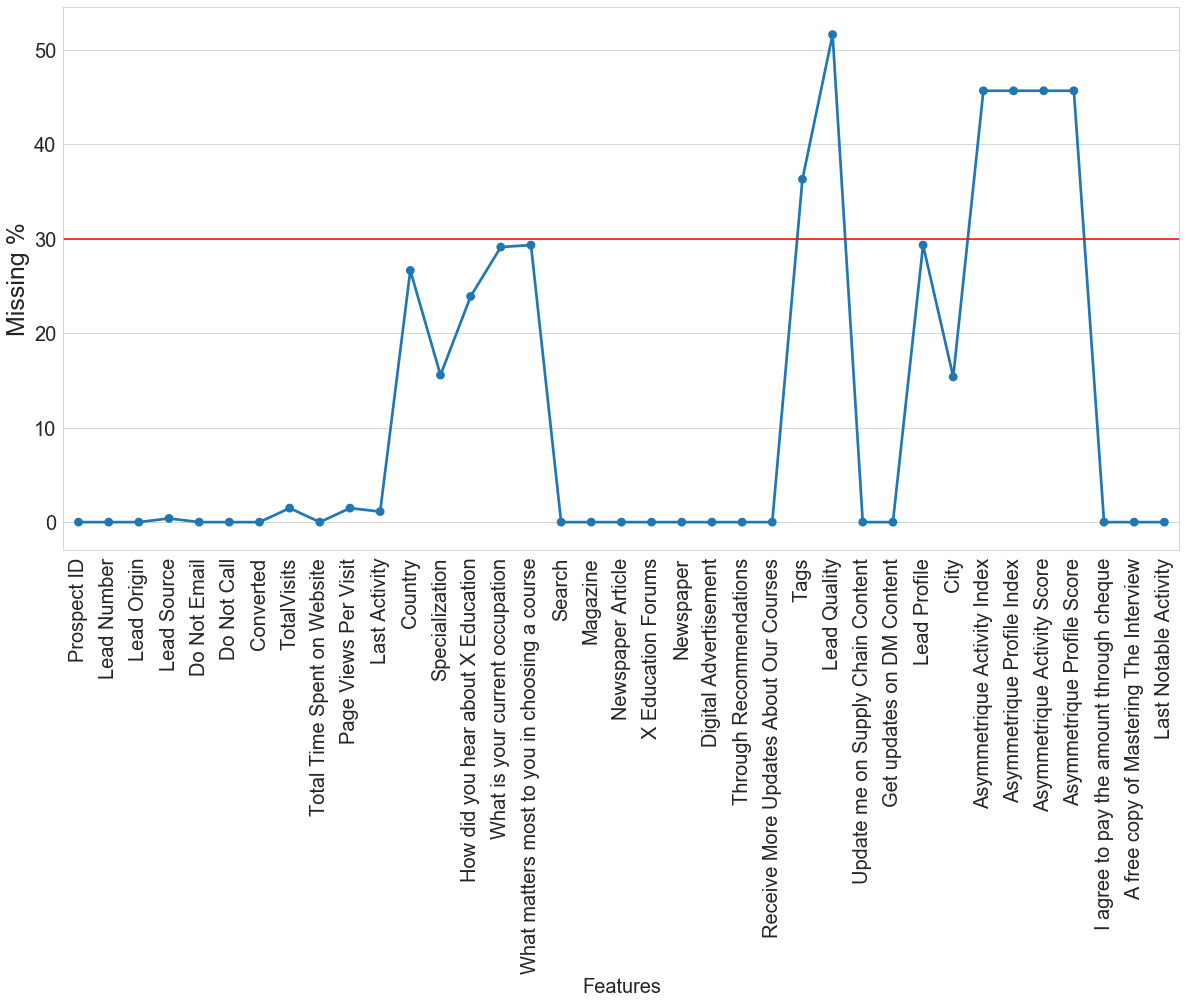

In [10]:
# Visualising the missing percentage of the data

plt.figure(figsize=(20,10))
sns.pointplot(x=missing.index,y=missing['Missing %'])
plt.axhline(y=30,color='r',linestyle='-')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Missing %',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.show()

In [11]:
# Dropping the columns with significantly high missing values (with more than 30%)

features = missing[missing['Missing %']<30]
features

Missing %
Prospect ID                                    0.000000 
Lead Number                                    0.000000 
Lead Origin                                    0.000000 
Lead Source                                    0.389610 
Do Not Email                                   0.000000 
Do Not Call                                    0.000000 
Converted                                      0.000000 
TotalVisits                                    1.482684 
Total Time Spent on Website                    0.000000 
Page Views Per Visit                           1.482684 
Last Activity                                  1.114719 
Country                                        26.634199
Specialization                                 15.562771
How did you hear about X Education             23.885281
What is your current occupation                29.112554
What matters most to you in choosing a course  29.318182
Search                                         0.000000 
Magazine                                       0.000000 
Newspaper Article                              0.000000 
X Education Forums                             0.000000 
Newspaper                                      0.000000 
Digital Advertisement                          0.000000 
Through Recommendations                        0.000000 
Receive More Updates About Our Courses         0.000000 
Update me on Supply Chain Content              0.000000 
Get updates on DM Content                      0.000000 
Lead Profile                                   29.318182
City                                           15.367965
I agree to pay the amount through cheque       0.000000 
A free copy of Mastering The Interview         0.000000 
Last Notable Activity                          0.000000

In [12]:
# Data set having columns with less significant missing values

leads1 = leads[features.index]

In [13]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Outlier Check

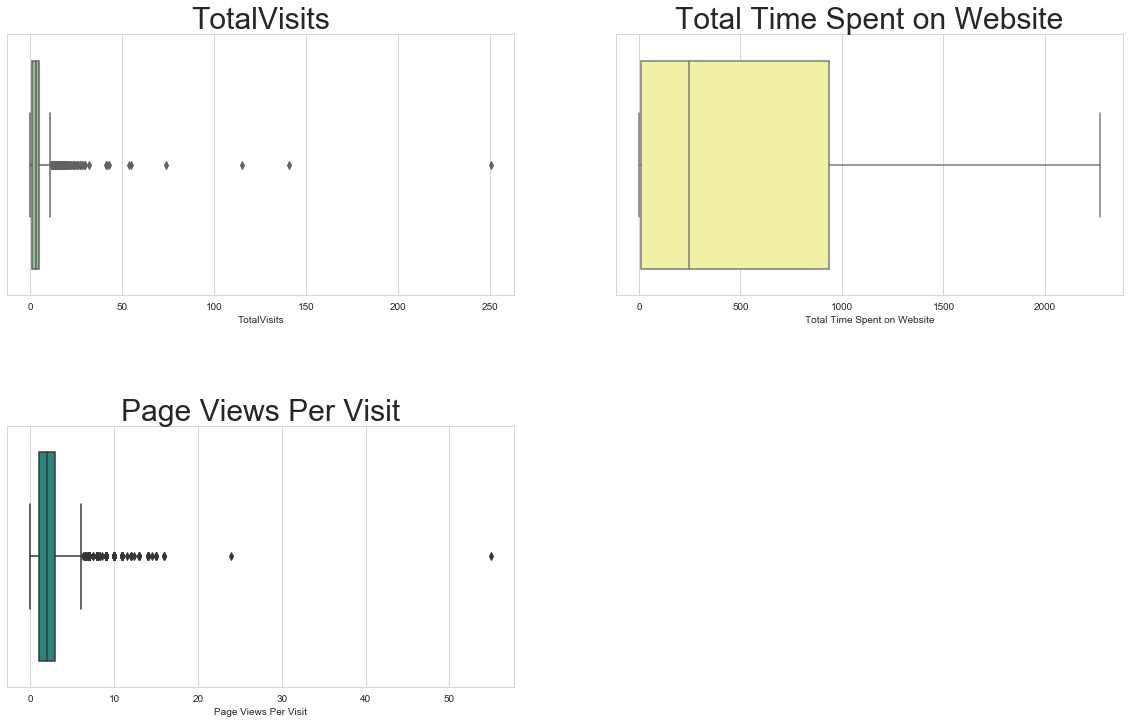

In [14]:
cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(20,12))
for i,j in enumerate(cols):
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(2,2,i+1)
    sns.boxplot(data=leads1,x=j,palette=rd.choice(cmap))
    plt.title(j,fontsize=30)
plt.show()


### <font color= green> Observations and Comments: </font>
We can observe that Total Visits and Page Views Per Visit have many outliers with a few having extremely high values.

### Prospect ID and Lead Number Column

In [15]:
# Checking the Prospect ID and Lead Number columns for duplicates.

print('Lead Number elements  :',leads1['Lead Number'].nunique())
print('Prospect ID elements  :',leads1['Prospect ID'].nunique())

Lead Number elements  : 9240
Prospect ID elements  : 9240


### Checking all the data variables 

In [16]:
# Classifying the categorical columns into binary and non-binary var as well as continous 
pd.set_option('display.max_rows',100)
binary =[]
not_binary = []
numeric=[]
for i in leads1.columns[1:]:
    if leads1[i].dtype=='O':
        if leads1[i].value_counts().index.size==2:
            binary.append(i)
            print('#Binary# - ',leads1[i].name)
            print('==============================')
            print(leads1[i].value_counts())
            print('------------------------------')
            print('\n')
        else:
            not_binary.append(i)
            print('#Non Binary# - ',leads1[i].name)
            print('==============================')
            print(leads1[i].value_counts())
            print('------------------------------')
            print('\n')
    else:
        numeric.append(i)
        print('#Continous # - ',leads1[i].name)
        print('==============================')
        print(leads1[i].value_counts())
        print('------------------------------')
        print('\n')

#Continous # -  Lead Number
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
------------------------------


#Non Binary# -  Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form              718 
Lead Import                55  
Quick Add Form             1   
Name: Lead Origin, dtype: int64
------------------------------


#Non Binary# -  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference            534 
Welingak Website     142 
Referral Sites       125 
Facebook             55  
bing                 6   
google               5   
Click2call           4   
Social Media         2   
Press_Release        2   
Live Chat            2   
WeLearn              1   
blog                 1   
testone              1   
youtubechannel       1   
welearnblog_

Name: A free copy of Mastering The Interview, dtype: int64
------------------------------


#Non Binary# -  Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website         318 
Olark Chat Conversation         183 
Email Link Clicked              173 
Email Bounced                   60  
Unsubscribed                    47  
Unreachable                     32  
Had a Phone Conversation        14  
Email Marked Spam               2   
Email Received                  1   
Form Submitted on Website       1   
View in browser link Clicked    1   
Resubscribed to emails          1   
Approached upfront              1   
Name: Last Notable Activity, dtype: int64
------------------------------




### <font color= green>Observations and Comments: </font>
1) By checking all the columns of the datasets we came to know that many columns have a Single category only. There is 0 % variance in these categorical columns which will not be a good option to keep. Hence, we decide to drop these columns.

2) We also noticed that there are some columns/ features whose categories are having very low frequencies. Hence, we can combine them into some common category and proceed with this strategy.

3) Also, there exist such columns which are very heavily imbalanced. Due to this, the variance in these data columns is very less. Hence, we can drop these columns too as they are not relevent for building the model.

In [17]:
# Columns with different dtypes seperated

print('Binary : \n')
print(binary)
print()
print('Non-Binary : \n')
print(not_binary)
print()
print('Continous : \n')
print(numeric)

Binary : 

['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

Non-Binary : 

['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'Last Notable Activity']

Continous : 

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


## Univariate Analysis

In [18]:
# Function for univariate Analysis

def univariate(data=None,x=None,fontsize=20,hue=None,exp=None,figsize=(20,8),rot=90,loc='upper right',pal=None):
    plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=1)
    plt.subplot(1,2,1)
    ax = sns.countplot(data=data,x=x,hue=hue,palette=rd.choice(pal))
    for i in ax.patches:
        plt.annotate(str(i.get_height()),(i.get_x()*1.01+i.get_width()/4,i.get_height()*1.01),fontsize=fontsize-3)
    plt.yscale('log')
    plt.xlabel(xlabel=None)
    plt.ylabel(ylabel=None)
    plt.xticks(fontsize=20,rotation=rot)
    plt.legend(labels=['Not Converted','Converted'],loc=loc,fontsize=fontsize)
    plt.title(x,fontsize=30,y=1.02)
        
    plt.subplot(1,2,2)
    bx = (data[x].value_counts(normalize=True)*100)
    bx.plot(kind='pie',explode=exp,autopct='%.2f',labels=bx.index
            ,shadow=True,textprops={'fontsize':20,'color':'black'},wedgeprops={'linewidth':5},colors=['deepskyblue','coral'])
    plt.title(f'Distribution : {x}',fontsize=30)
    plt.ylabel(ylabel=None)
    
    plt.show()
    

def univariate_1(data=None,x=None,fontsize=20,hue=None,figsize=(20,8),rot=90,loc='upper right',pal=None):
    plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=1)
    plt.subplot(1,2,1)
    ax = sns.countplot(data=data,x=x,hue=hue,palette=rd.choice(pal))
    for i in ax.patches:
        plt.annotate(str(i.get_height()),(i.get_x()*1.01+i.get_width()/4,i.get_height()*1.01),fontsize=fontsize-3)
    plt.yscale('log')
    plt.xlabel(xlabel=None)
    plt.ylabel(ylabel=None)
    plt.xticks(fontsize=20,rotation=rot)
    plt.legend(labels=['Not Converted','Converted'],loc=loc,fontsize=fontsize)
    plt.title(x,fontsize=30,y=1.02)
    
    #leads1[[x,'Converted']].groupby(by=x).sort_values()
    a=leads1.groupby(by=x)['Converted'].mean().sort_values()
    
    plt.subplot(1,2,2)
#   cx = sns.barplot(data=a,x=x,y='Converted',palette=rd.choice(pal),ci=None)
    cx = a.plot(kind='bar',cmap=rd.choice(palette),hatch=rd.choice(hatch))
    for i in cx.patches:
        plt.annotate(str(round(i.get_height(),2)),(i.get_x()*1.01+i.get_width()/4,i.get_height()*1.01),fontsize=fontsize-3)
    plt.title(f'Conversion Rate %',fontsize=30)
    plt.xticks(fontsize=20,rotation=rot)
    plt.xlabel(xlabel=None)
    plt.ylabel(ylabel='Converted',fontsize=20)
    plt.show()

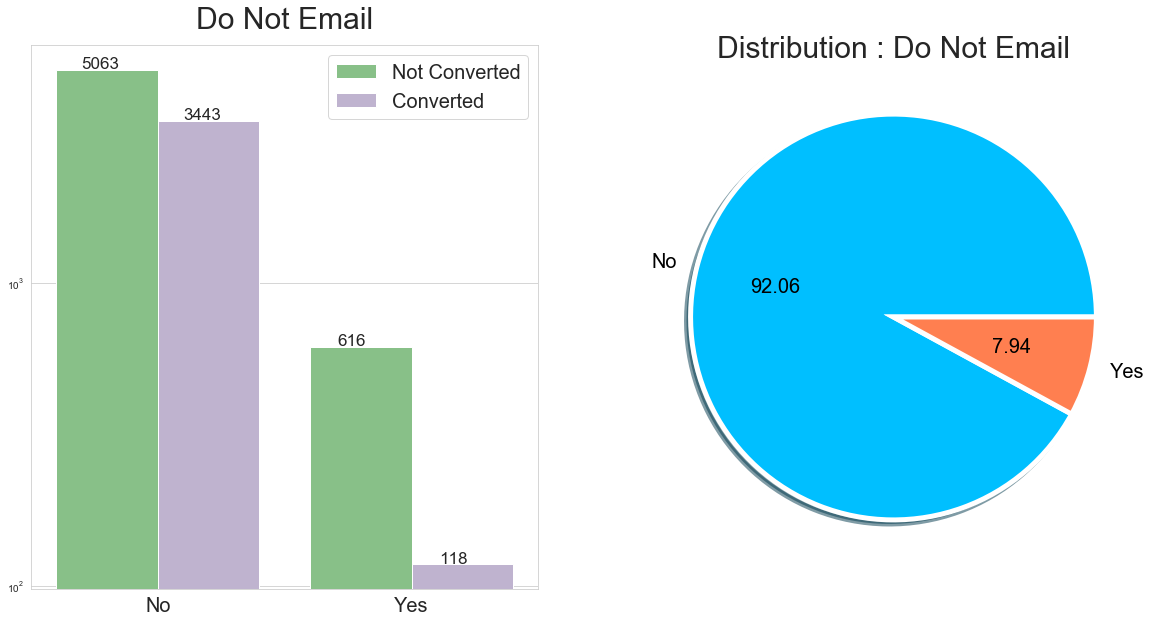

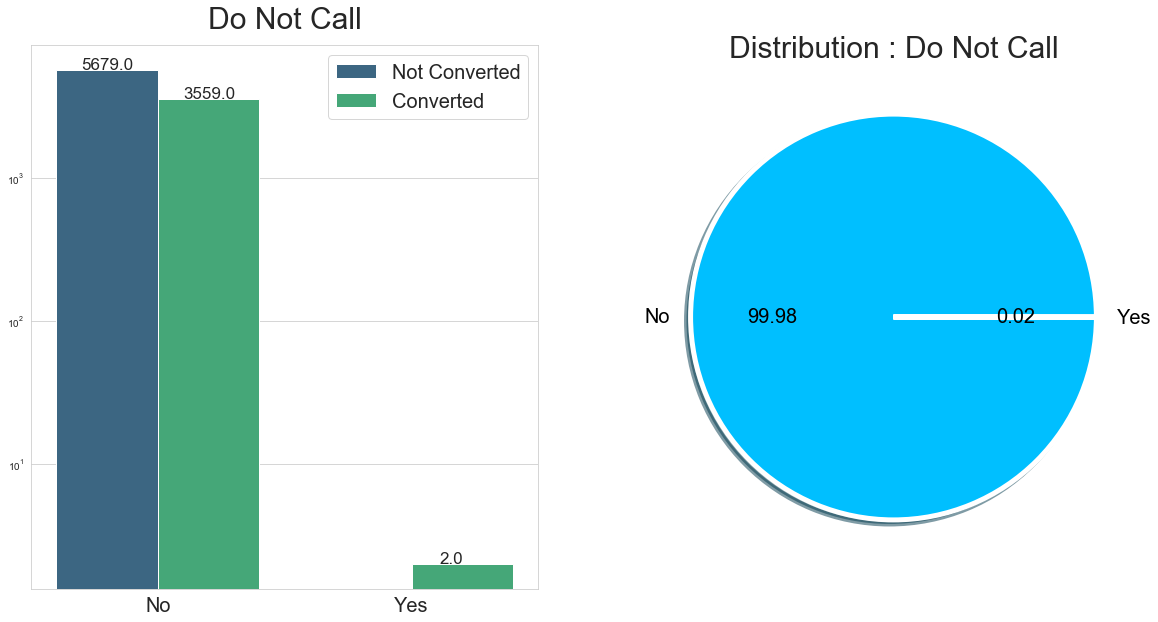

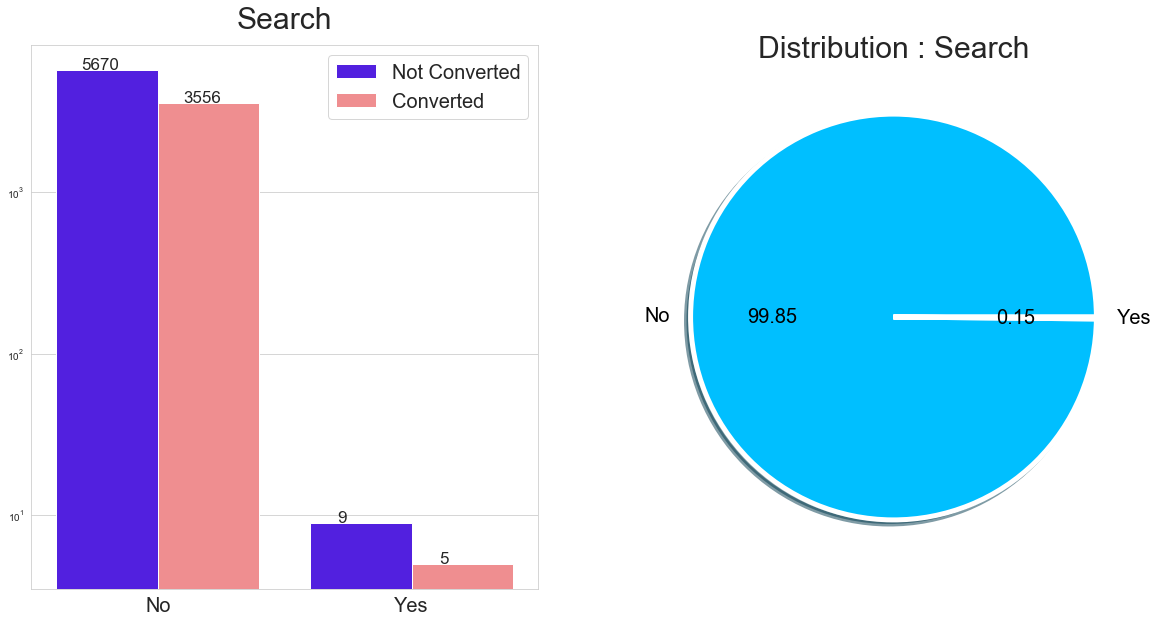

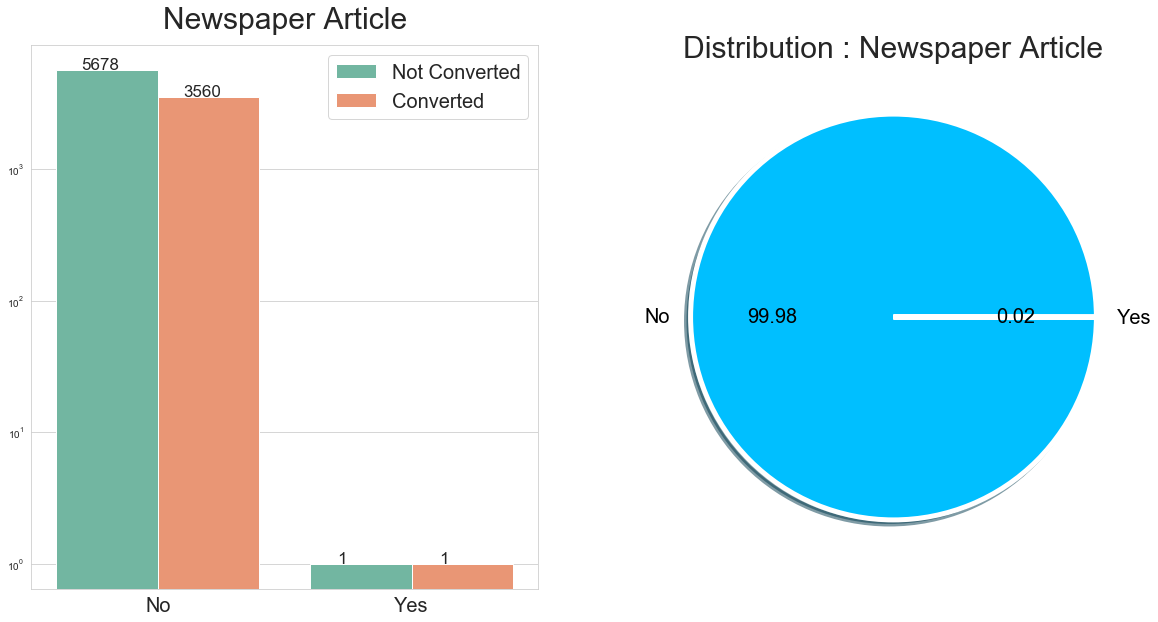

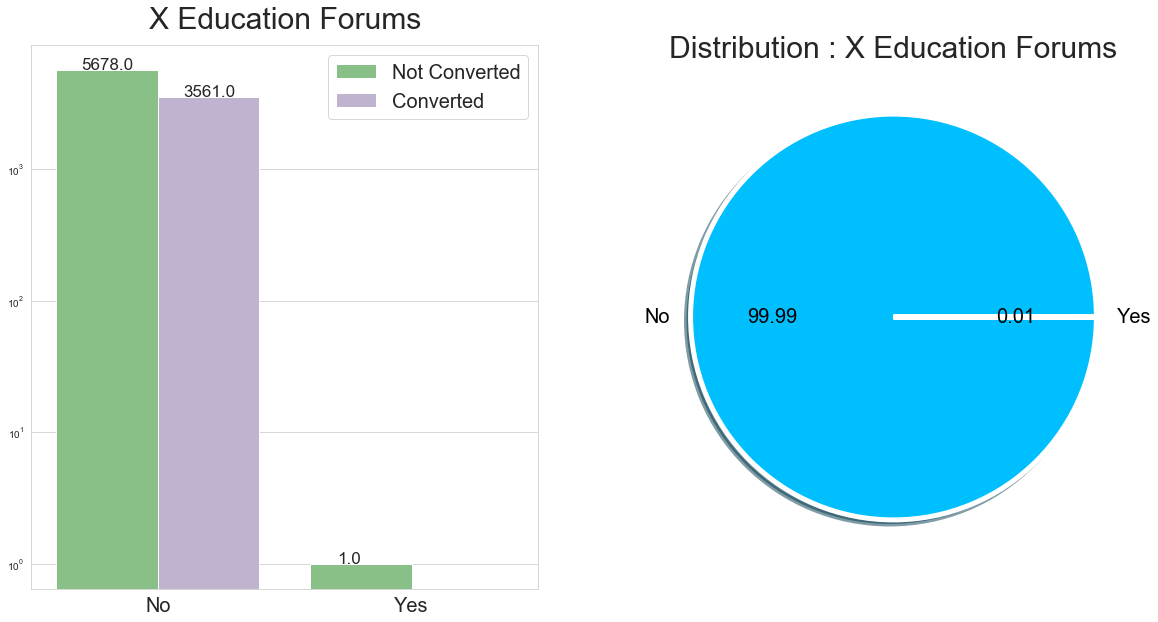

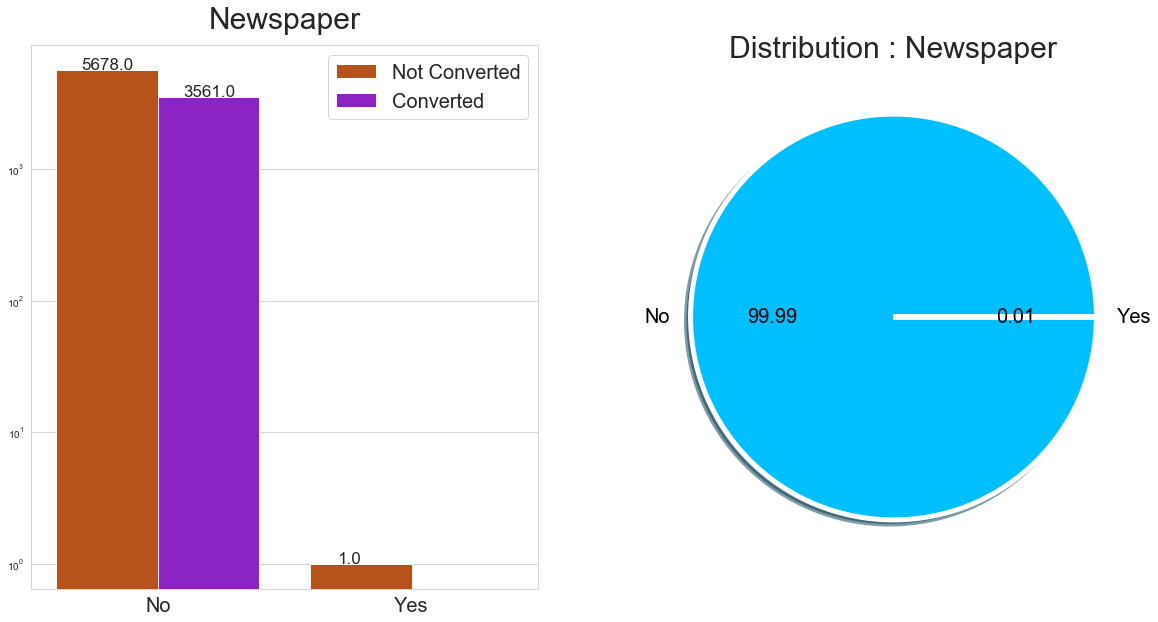

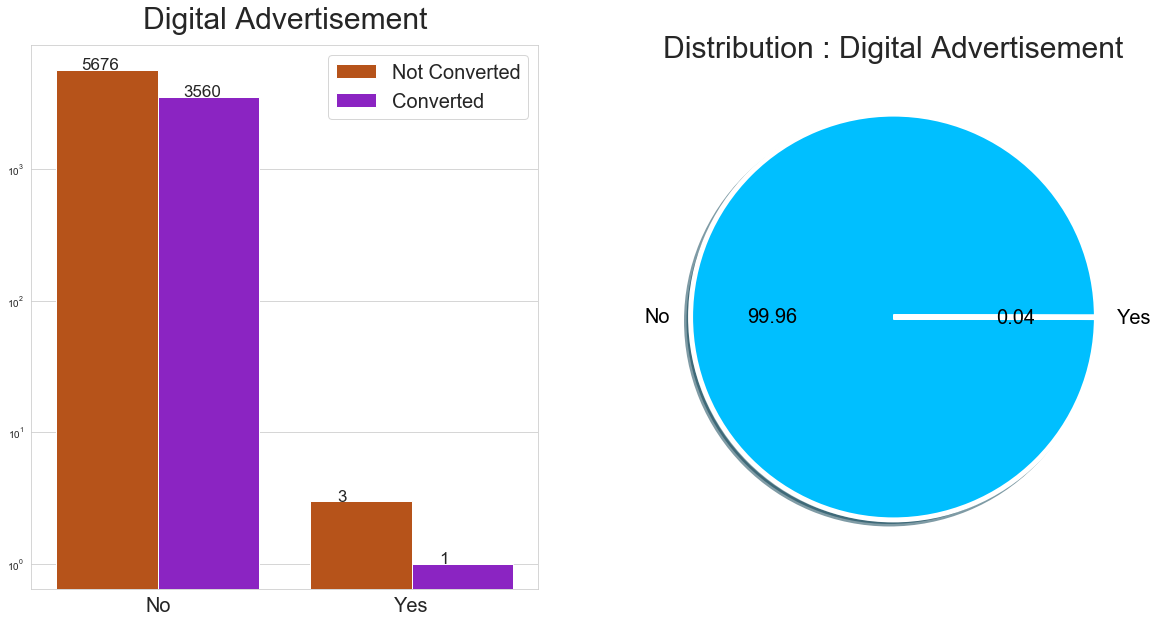

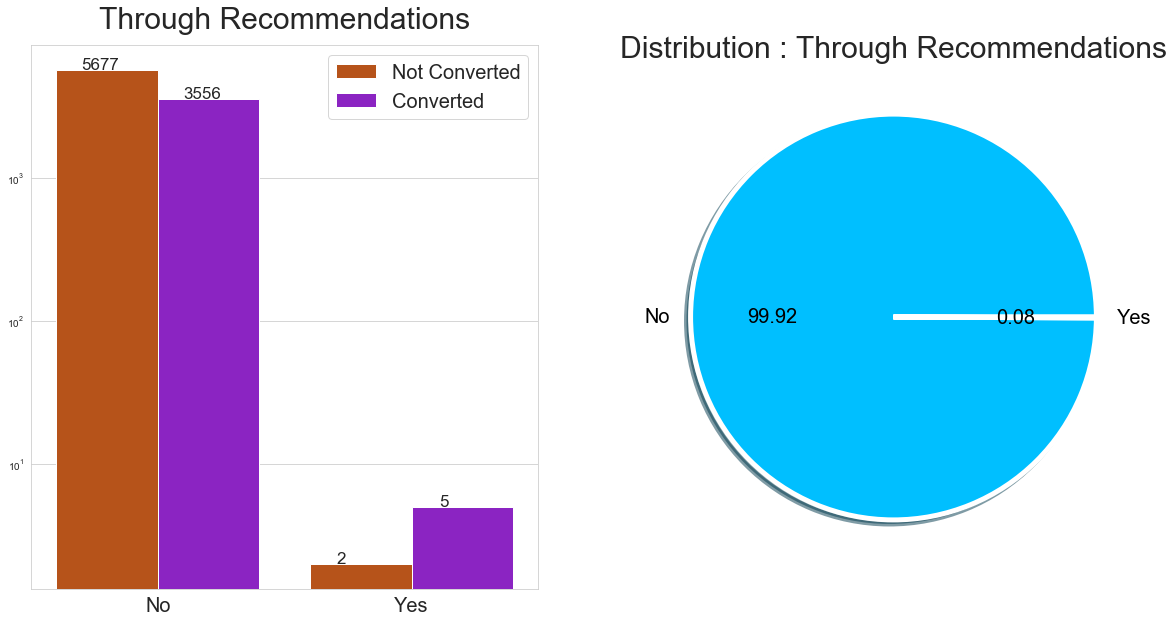

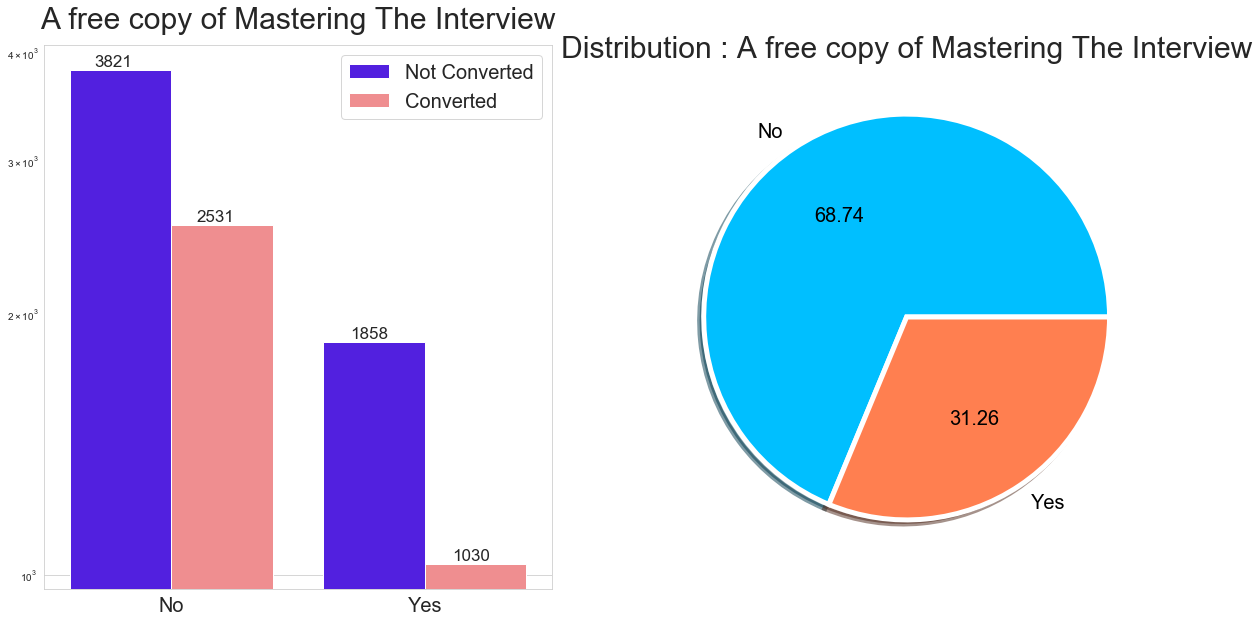

In [19]:
# Binary Columns

for i,j in enumerate(binary):
    univariate(data=leads1,hue='Converted',x=j,figsize=(20,10),fontsize=20,rot=0,pal=cmap)
    print('==========================================================================================================================')

### <font color= green>Observations and Comments: </font>
1) From the above countplots we can see that the frequency of No's are far greater than the distribution of Yes's. In other words the levels of these columns are not unevenly distributed and has extremely low variance.

The columns which are having this type of distributions are as follows - 
> - Do Not Email 
> - Do not Call
> - Search
> - Newspaper
> - Newspaper Article
> - X Education Forums
> - Through Recommendations
> - Digital Advertisements

2) For the above columns it is better to drop them than to retain them.

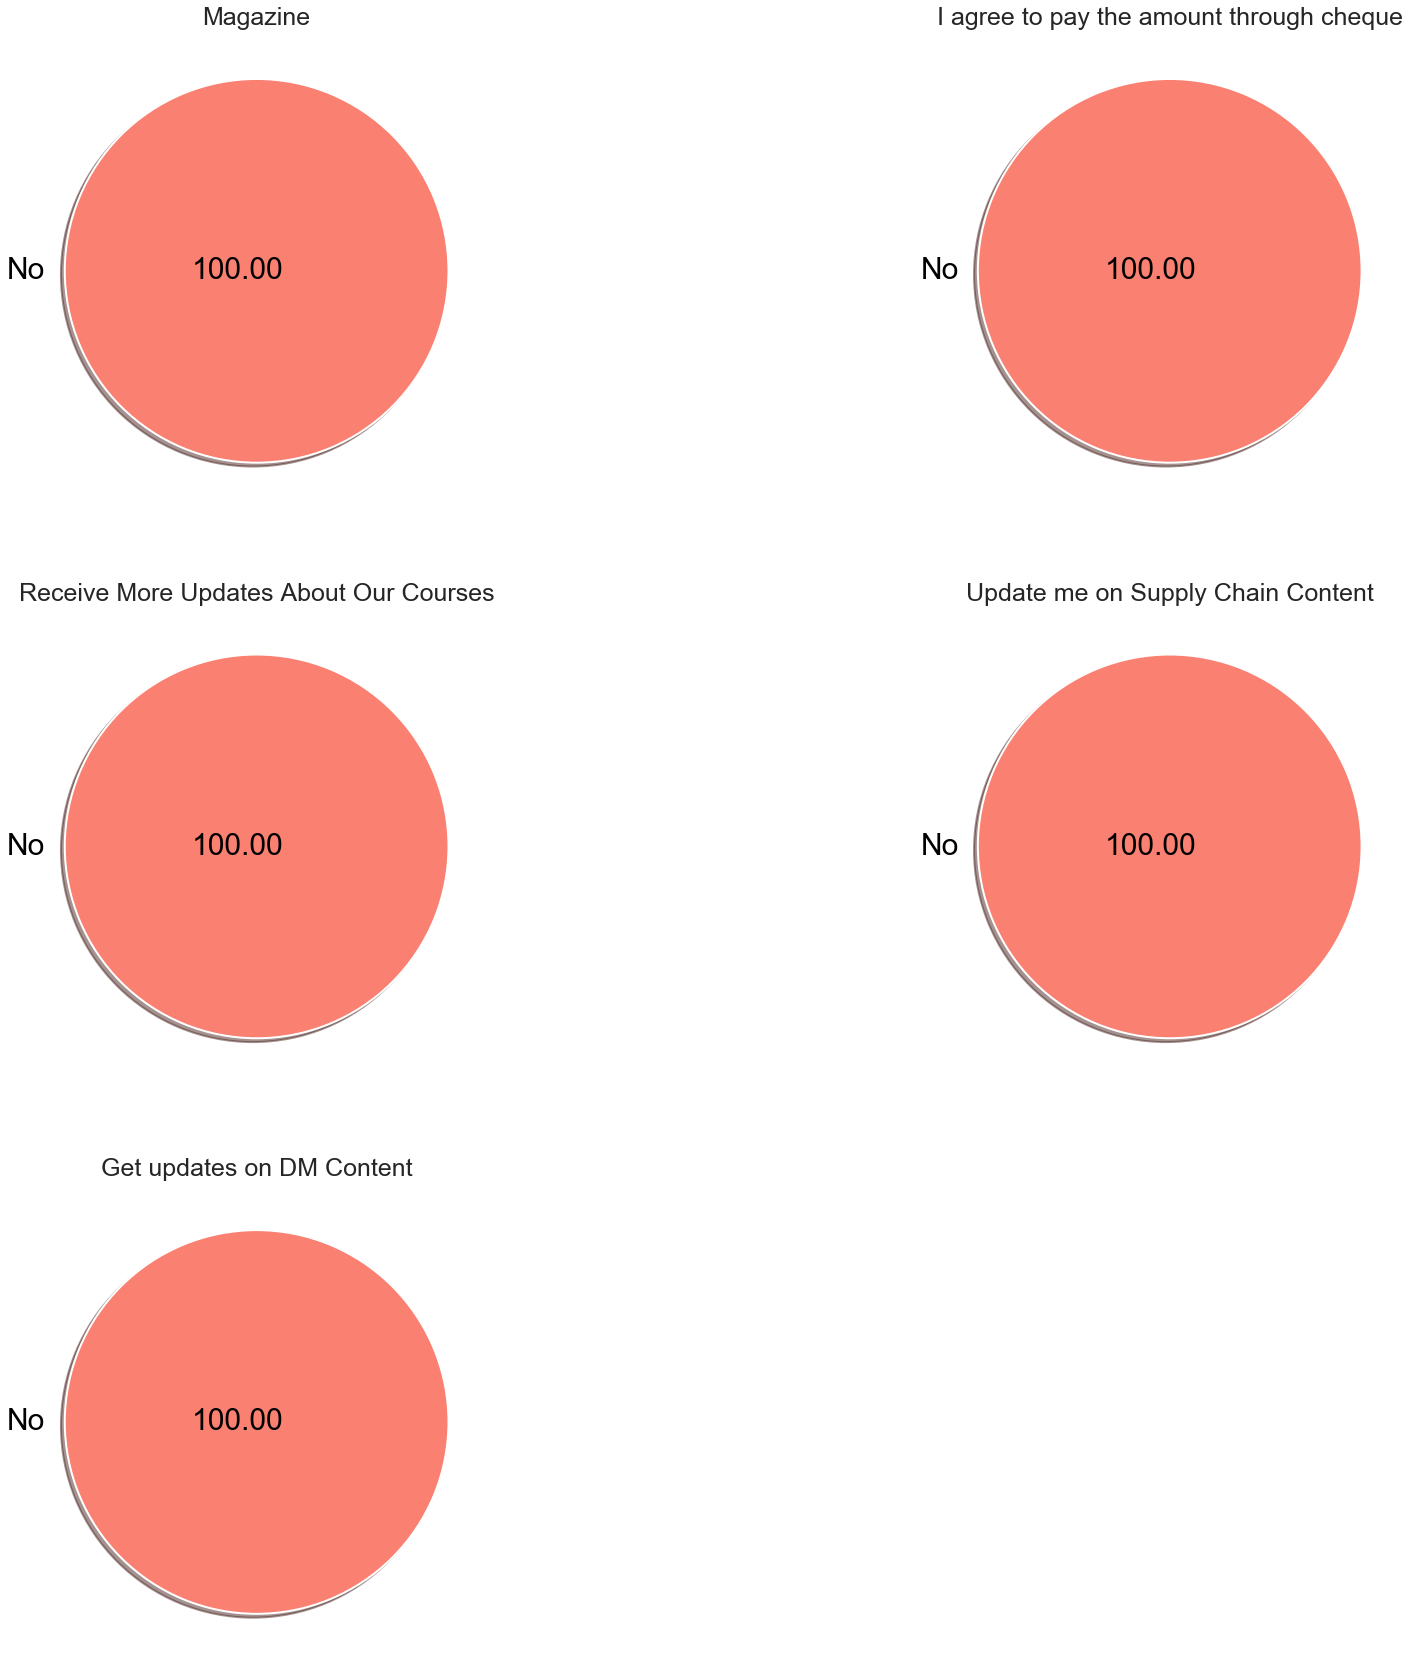

In [20]:
# Columns with only single Category
cols=['Magazine', 'I agree to pay the amount through cheque', 
      'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',]

plt.figure(figsize=(30,30))
for i,j in enumerate(cols):
    plt.subplot(3,2,i+1)
    plt.pie(x=leads1[j].value_counts(),colors=['salmon'],pctdistance=0.1,shadow=True,
            autopct='%.2f',labels=['No'],textprops={'fontsize':30,'color':'black'},wedgeprops={'linewidth':2})
    plt.title(j,fontsize=25)
plt.show()

### <font color= green>Observations and Comments: </font>

From these pie charts it is clearly visible that these columns have only one category so we can drop these columns. This is because, if we dummify them, then most probably all the records will become 1 which can give us spurious results. So, we will be better off without these columns.

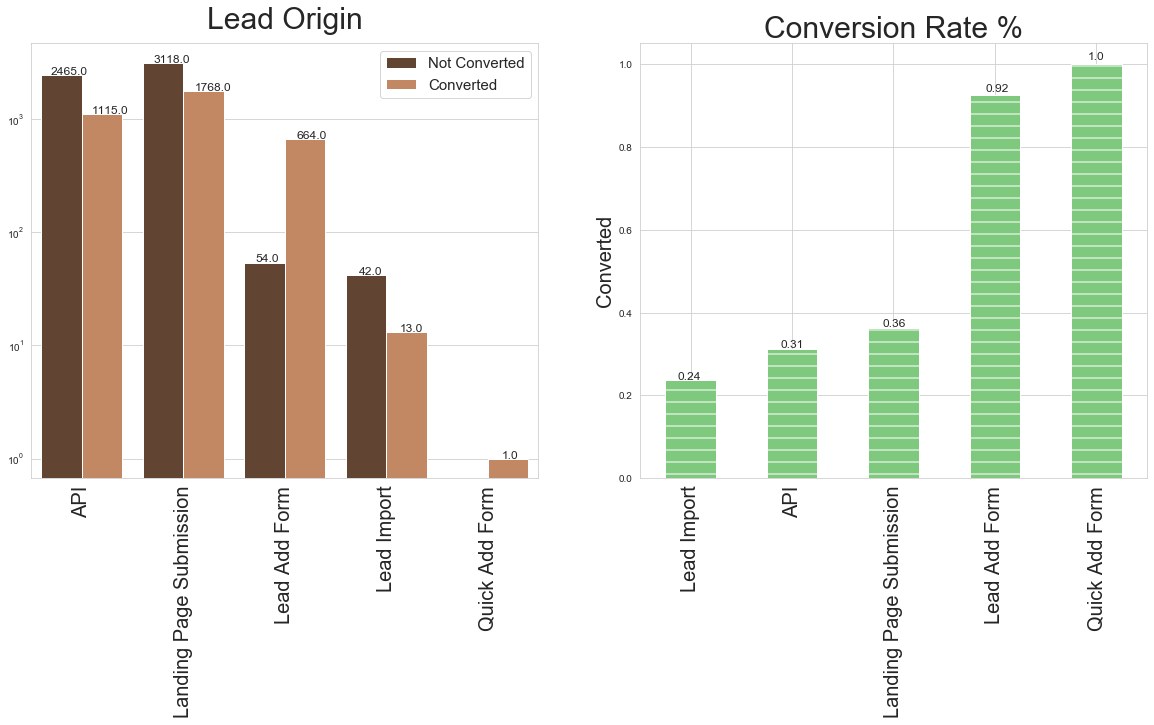

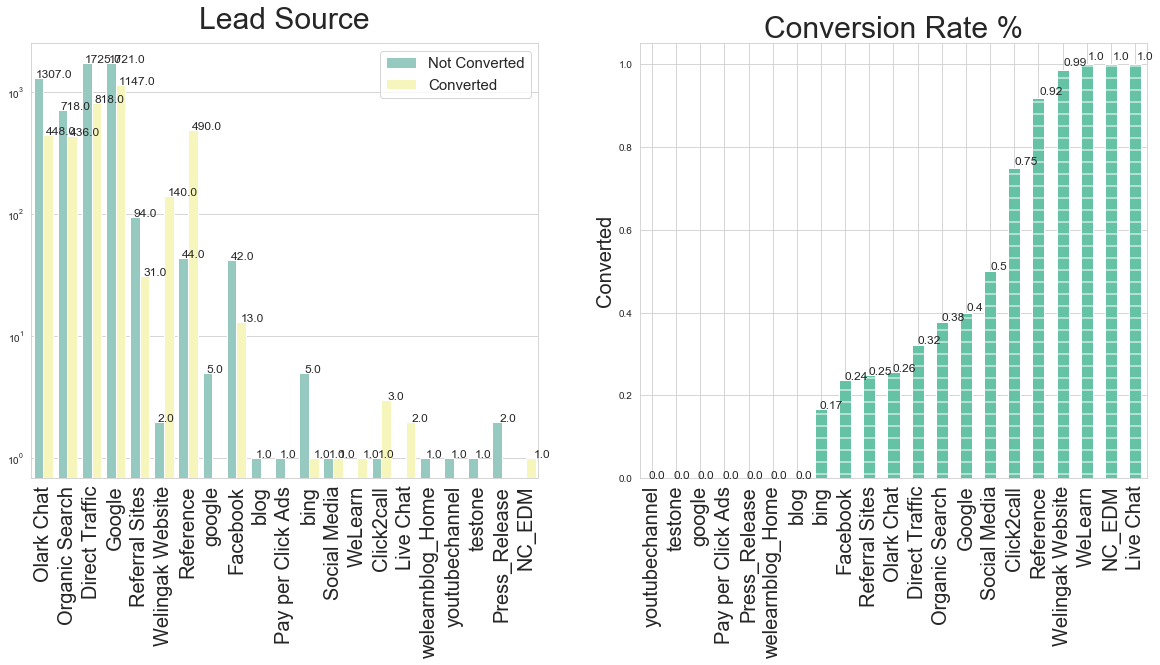

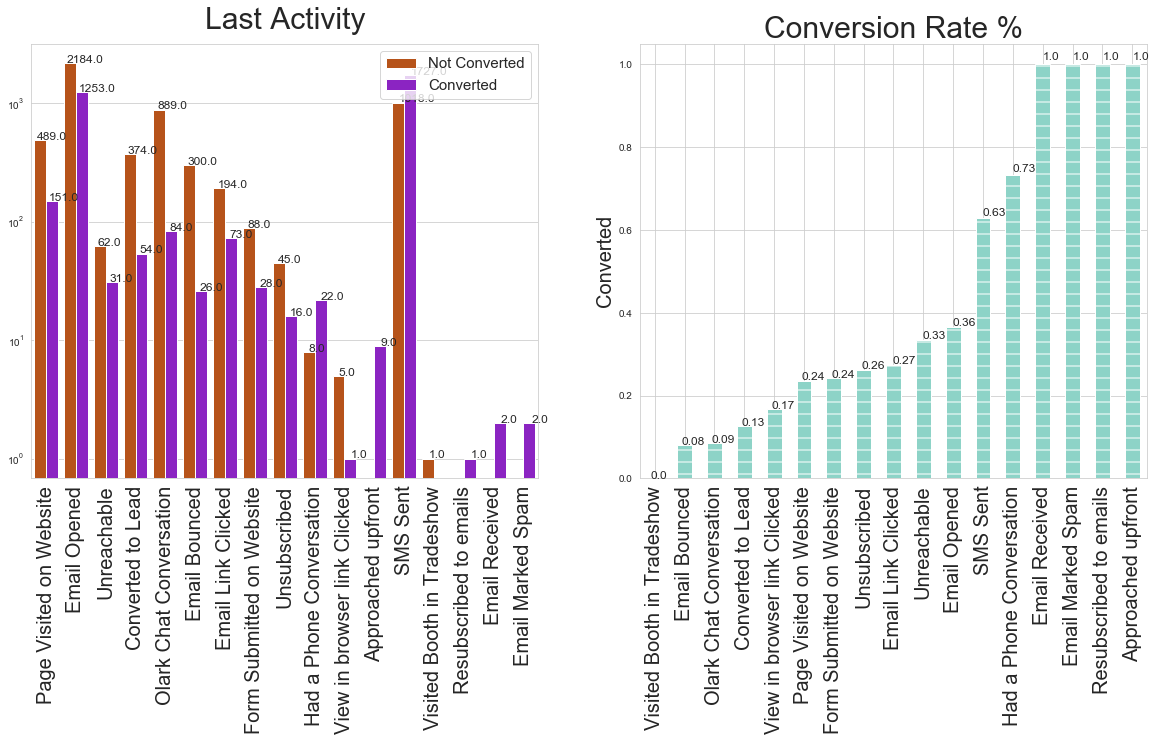

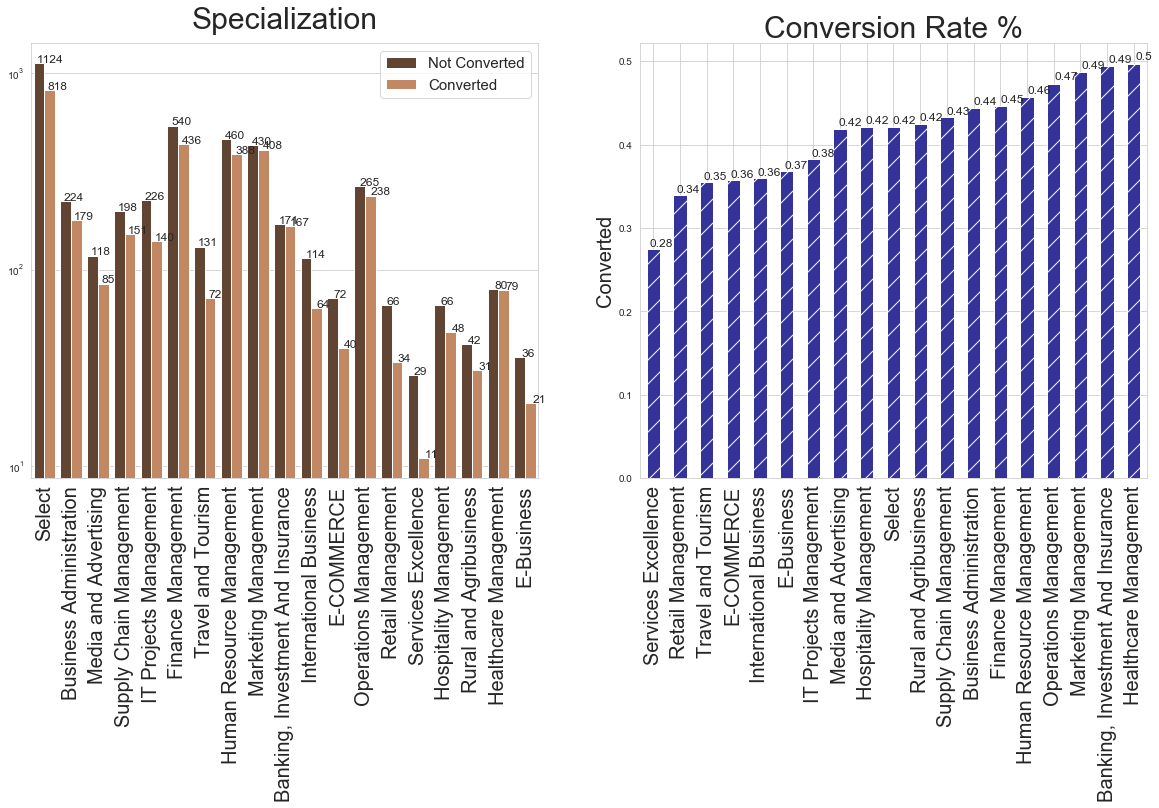

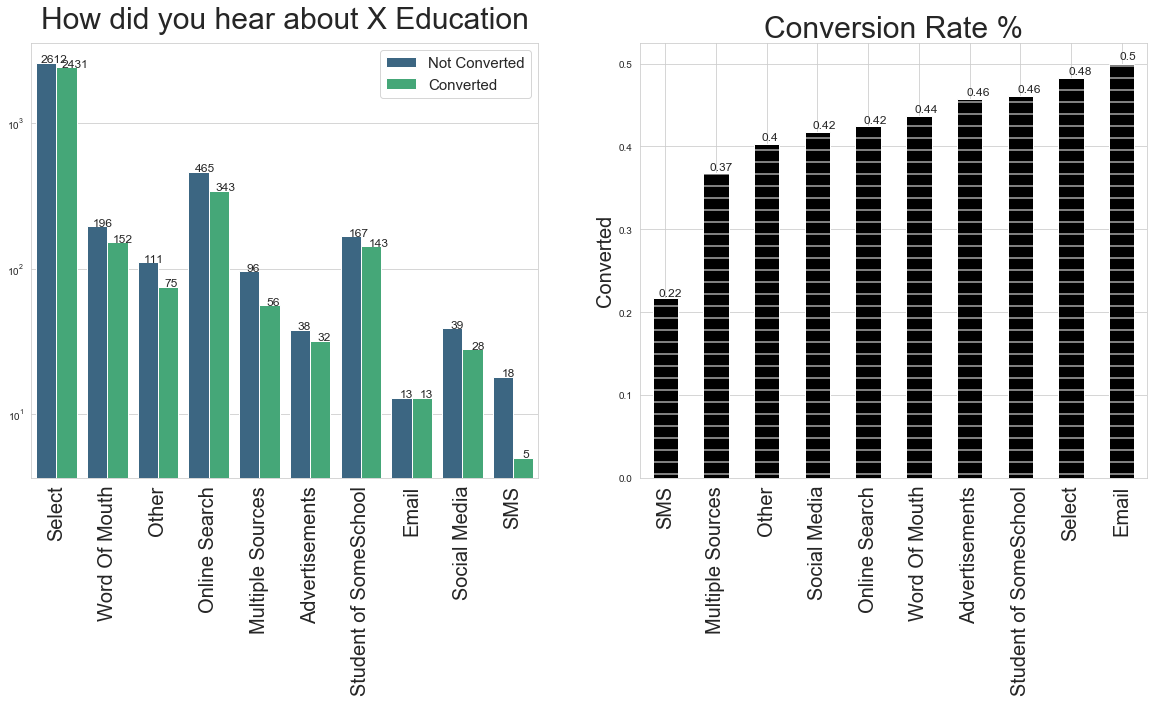

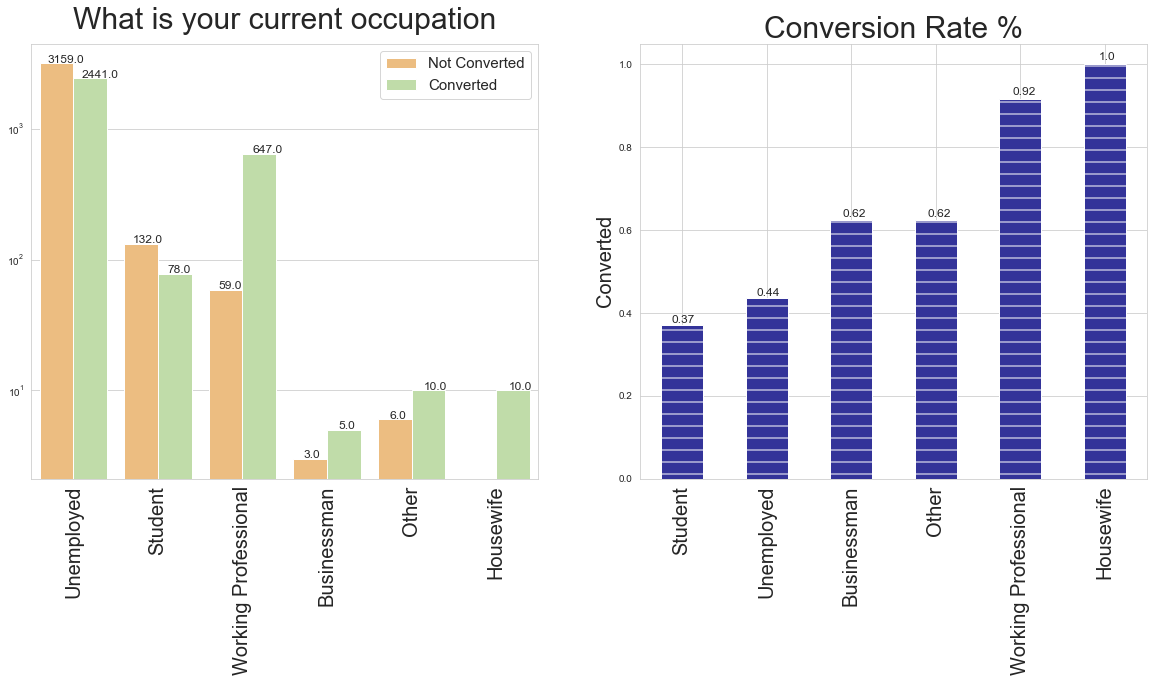

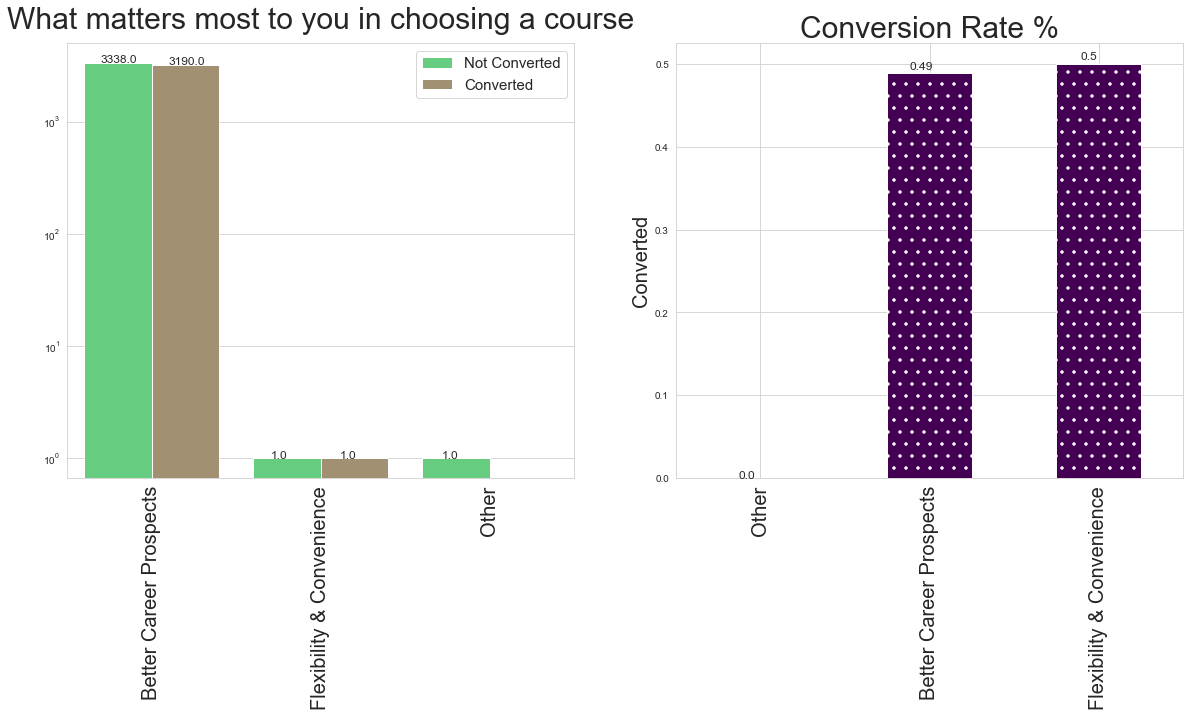

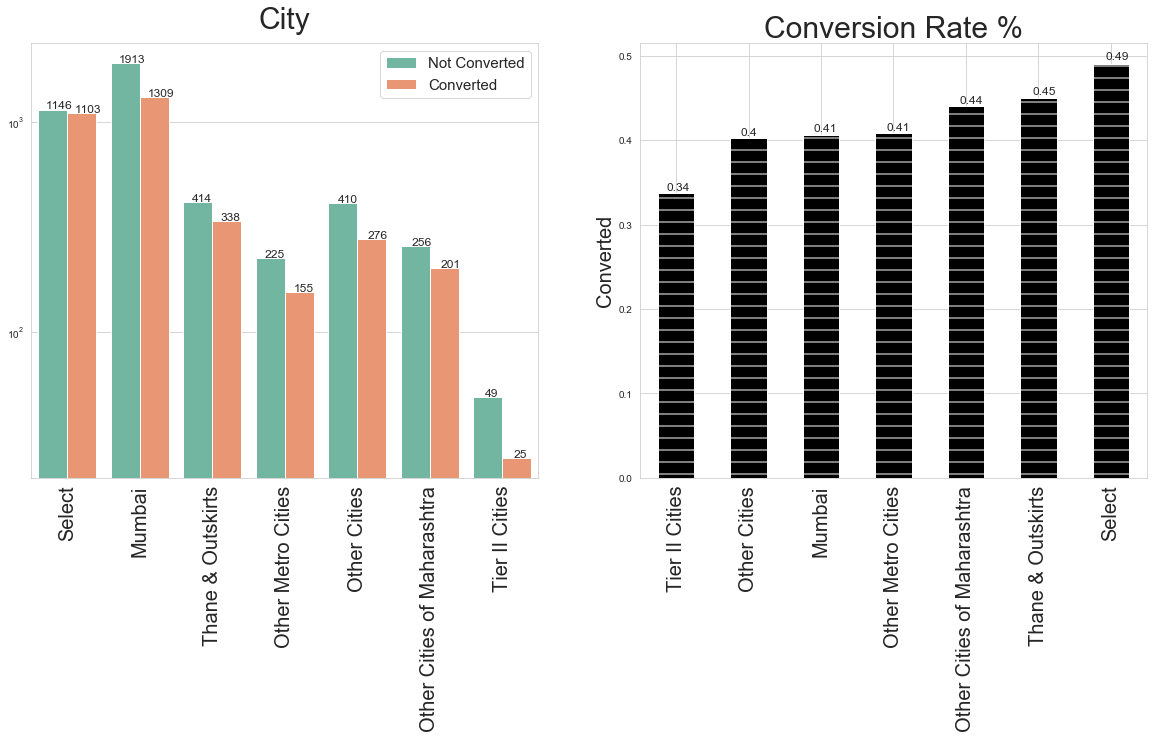

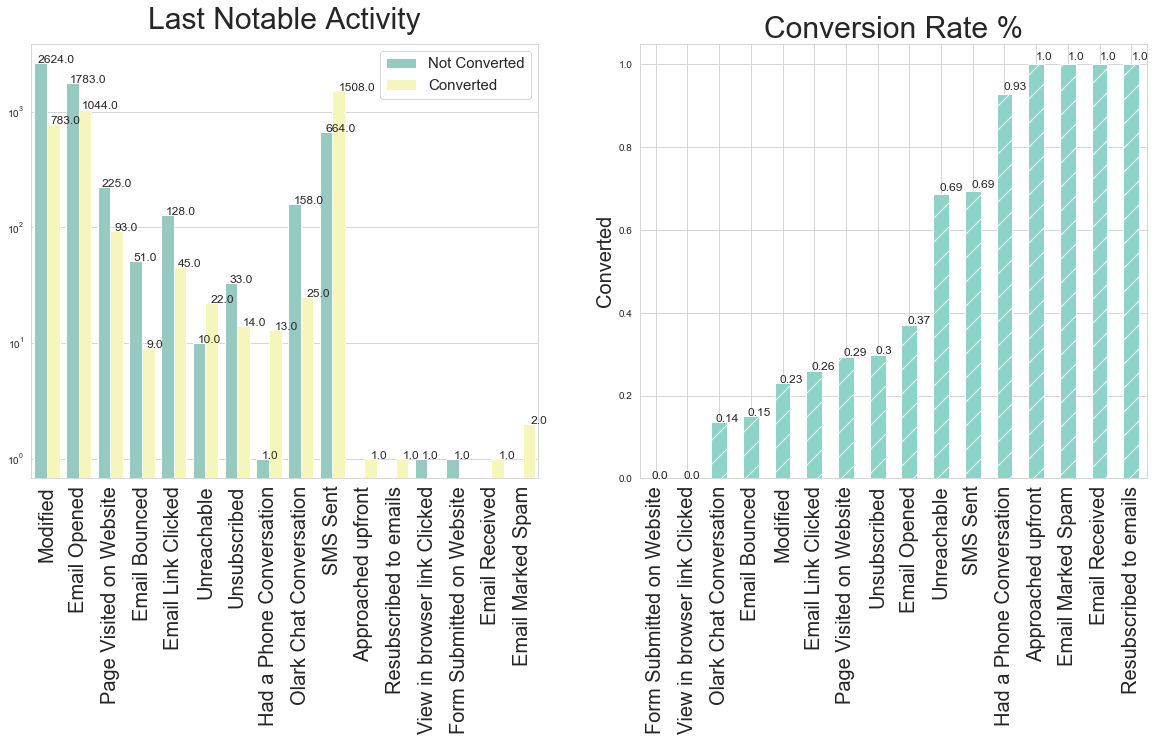

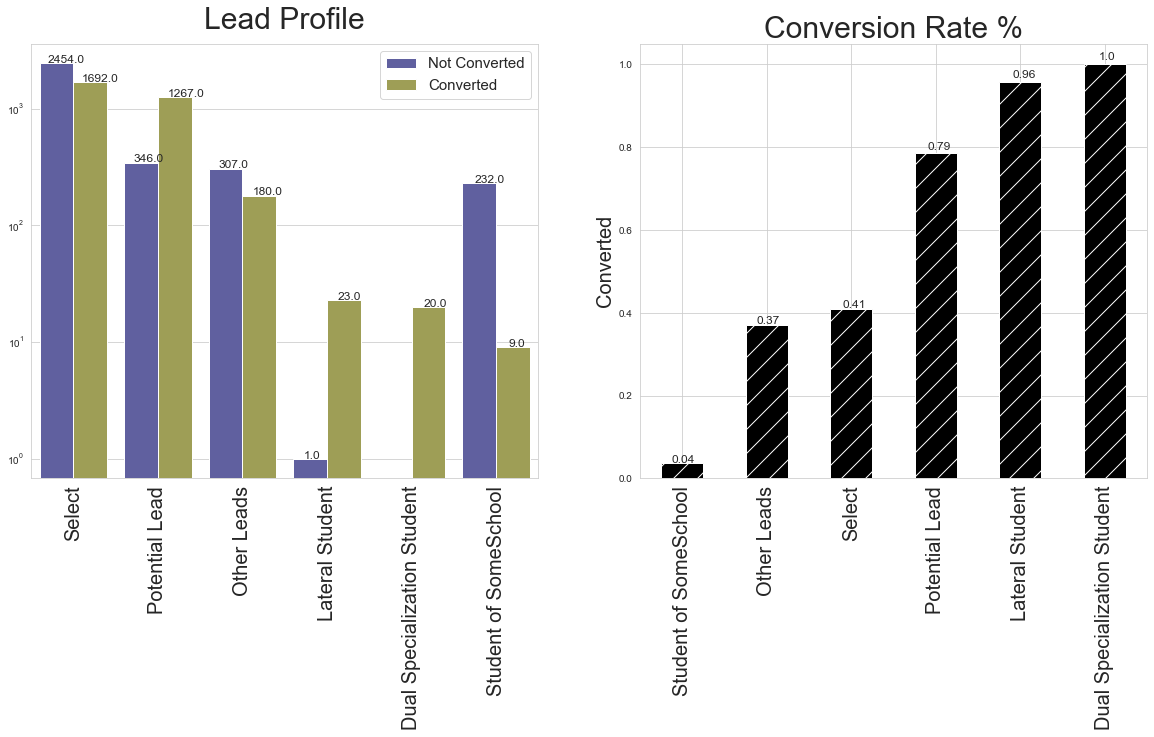

In [21]:
# Categorical Nominal Columns

cols=['Lead Origin', 'Lead Source', 'Last Activity','Specialization','How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course',
      'City', 'Last Notable Activity','Lead Profile']

for i,j in enumerate(cols):
    univariate_1(data=leads1,x=j,hue='Converted',fontsize=15,figsize=(20,8),pal=palette)
    print('==========================================================================================================================')

### <font color= green>Observations and Comments: </font>

1) In the column Lead Origin, we see that Quick Add Form has the highest conversion rate. Lead Add Form has the second highest number of conversions with the rate as 92%. Lead Import has the lowest conversion rate.

2) The Lead Sources that generates the highest Conversions are from Live Chat, NC_EDN, WeLearn.On the other hand, Welingak website gives the best converted to not converted ratio. Majority of the leads coming from this source tend to convert. And Reference also gives good conversion rate.

3) If customers have last activities like Approaching Upfront or Resubscribe to the Email, they tend to convert. People contacted through email services despite of marked as spam has the high chance to convert. The company can also improve the conversion rate through emails if emails are less likely to bounce.

4) If the customer's occupation is either Housewife or Working professional, they tend to convert more than people from other occupations. Students and unemployed customers has a less chance to convert.

5) If the lead profile is either Dual Specialization Student or Lateral Student, they tend to convert more. Lead conversion rate is lower for the school students.

In [22]:
# Checking the last activity column to see email marked spam category
leads1[leads1['Last Activity']=='Email Marked Spam']

Prospect ID  Lead Number  \
8110  9f1ca97f-5af5-4d1f-8c93-5883a947c6ac  587905        
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  579564        

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
8110  Lead Add Form            Reference       Yes          No           
9235  Landing Page Submission  Direct Traffic  Yes          No           

      Converted  TotalVisits  Total Time Spent on Website  \
8110  1          0.0          0                             
9235  1          8.0          1845                          

      Page Views Per Visit      Last Activity       Country  \
8110  0.00                  Email Marked Spam  NaN            
9235  2.67                  Email Marked Spam  Saudi Arabia   

                 Specialization How did you hear about X Education  \
8110  Human Resource Management  Select                              
9235  IT Projects Management     Select                              

     What is your current occupation  \
8110  Unemployed                       
9235  Unemployed                       

     What matters most to you in choosing a course Search Magazine  \
8110  Better Career Prospects                       No     No        
9235  Better Career Prospects                       No     No        

     Newspaper Article X Education Forums Newspaper Digital Advertisement  \
8110  No                No                 No        No                     
9235  No                No                 No        No                     

     Through Recommendations Receive More Updates About Our Courses  \
8110  No                      No                                      
9235  No                      No                                      

     Update me on Supply Chain Content Get updates on DM Content  \
8110  No                                No                         
9235  No                                No                         

        Lead Profile    City I agree to pay the amount through cheque  \
8110  Potential Lead  Select  No                                        
9235  Potential Lead  Mumbai  No                                        

     A free copy of Mastering The Interview Last Notable Activity  
8110  No                                     Email Marked Spam     
9235  No                                     Email Marked Spam

### <font color=green>Observations and Comments</font>
- Although the 'Last Activity' is 'Email Marked Spam' which should ideally not lead to any conversions but we can see that the origin of these leads is an alternative source other than Emails.

# Step 3: Fixing the columns and handling the missing values 

## Categorical Columns

### Lead Source column

In [23]:
# Check the values of the Lead Source Column
leads1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference            534 
Welingak Website     142 
Referral Sites       125 
Facebook             55  
bing                 6   
google               5   
Click2call           4   
Social Media         2   
Press_Release        2   
Live Chat            2   
WeLearn              1   
blog                 1   
testone              1   
youtubechannel       1   
welearnblog_Home     1   
Pay per Click Ads    1   
NC_EDM               1   
Name: Lead Source, dtype: int64

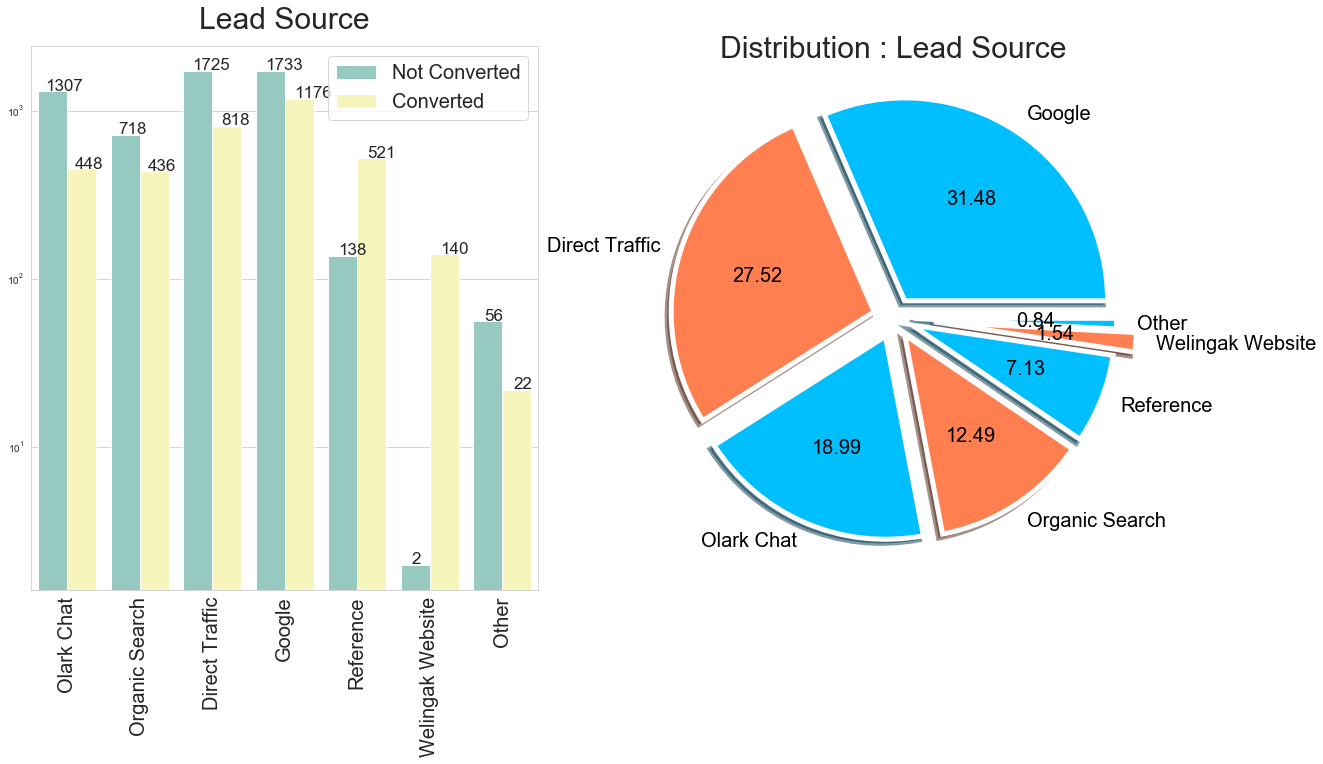

In [24]:
# Fixing the categories
leads1['Lead Source'].replace('google','Google',inplace=True)

# Treating the missing values
leads1['Lead Source'].fillna(leads1['Lead Source'].mode()[0],inplace=True)


# Making a new category for the Lead Source Column
leads1['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','Live Chat',
                               'Social Media','Pay per Click Ads','NC_EDM','testone','youtubechannel',
                               'welearnblog_Home','WeLearn','blog'],'Other',inplace=True)

# Combining referral colunms
leads1['Lead Source'].replace('Referral Sites','Reference',inplace=True)

# Plot for visualisation
univariate(data=leads1,hue='Converted',x='Lead Source',fontsize=20,figsize=(20,10),pal=cmap,exp=[0.1,0.1,0.1,0.1,0.1,0.2,0.1])

### Lead Origin column

In [25]:
leads1['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [26]:
# Making the new category as other
leads1['Lead Origin'].replace(['Quick Add Form','Lead Import','Lead Add Form'],'Other',inplace=True)

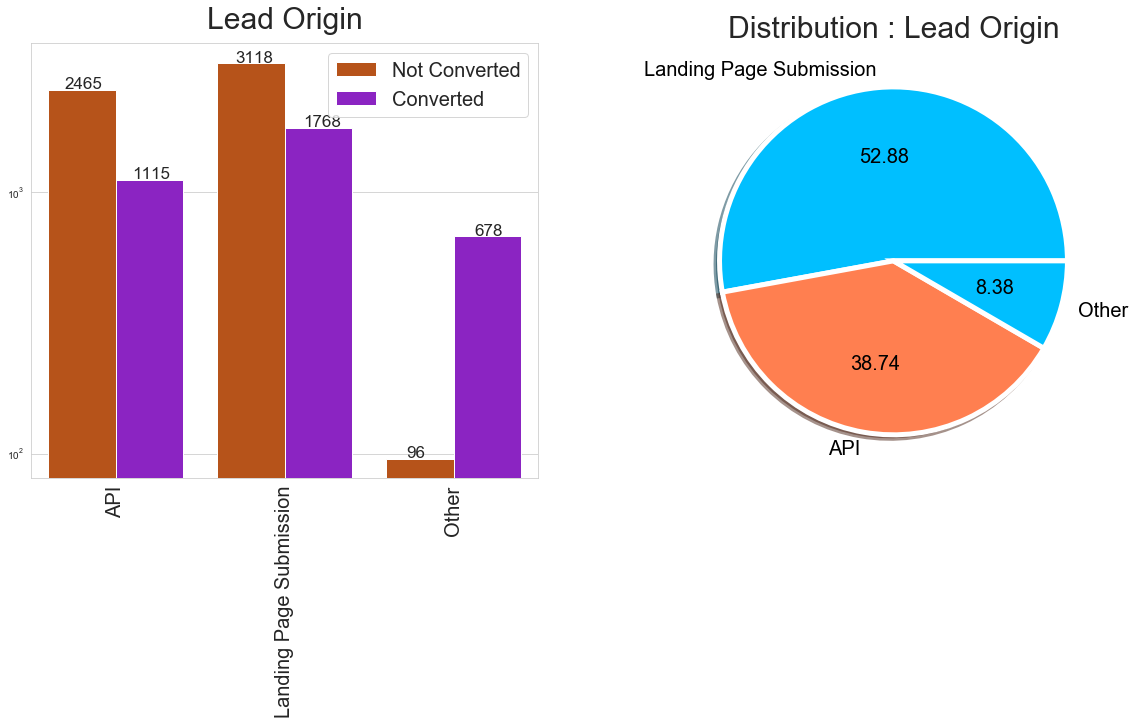

In [27]:
# Plot for lead origin
univariate(data=leads1,x='Lead Origin',hue='Converted',figsize=(20,8),pal=cmap)

### What matters most to you in choosing a course column

In [28]:
# Checking the values category wise
leads1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience    2   
Other                        1   
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
# Handling the missing values
leads1['What matters most to you in choosing a course'].fillna(leads1['What matters most to you in choosing a course'].mode()[0],inplace=True)

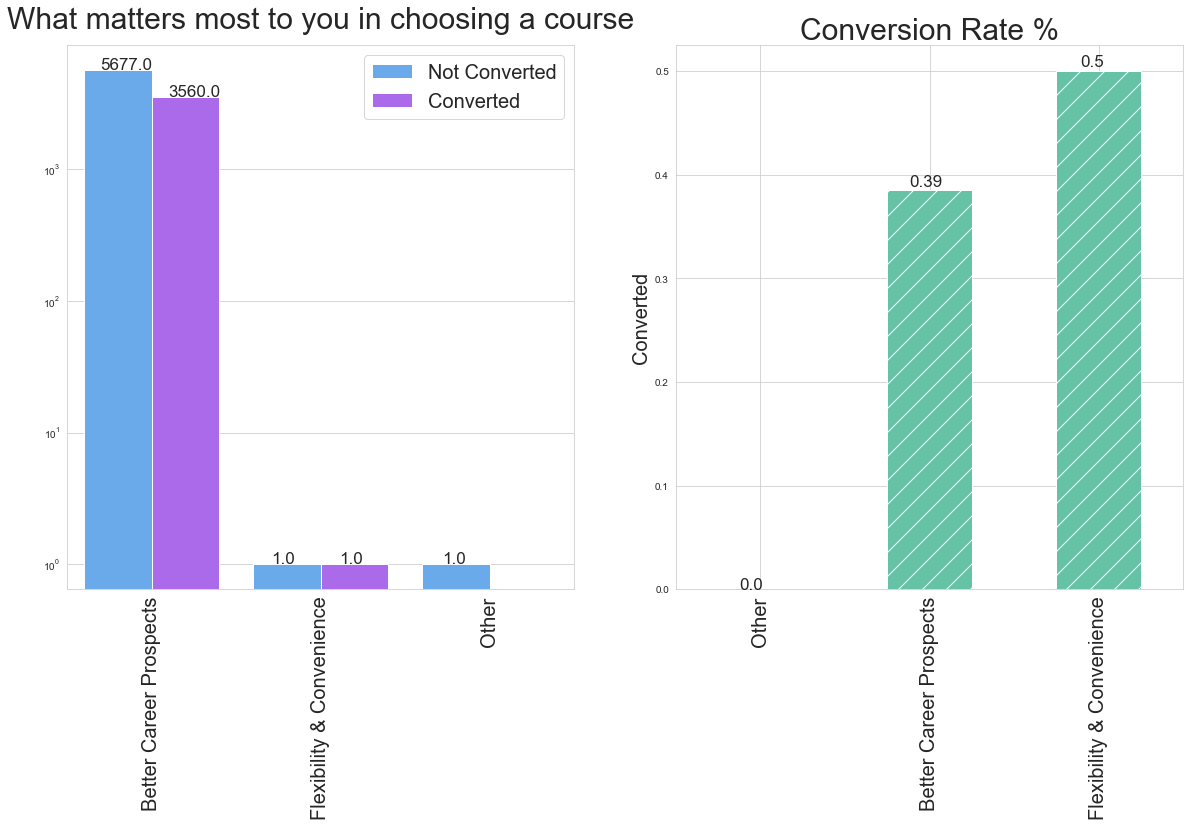

In [30]:
# Plotting the graph for the column
univariate_1(data=leads1,x='What matters most to you in choosing a course',hue='Converted',rot=90,pal=['cool'],figsize=(20,10))

### How did you hear about X Education column

In [31]:
# Checking the values category wise 
leads1['How did you hear about X Education'].value_counts()

Select                   5043
Online Search            808 
Word Of Mouth            348 
Student of SomeSchool    310 
Other                    186 
Multiple Sources         152 
Advertisements           70  
Social Media             67  
Email                    26  
SMS                      23  
Name: How did you hear about X Education, dtype: int64

In [32]:
# Handling the missing values
leads1['How did you hear about X Education'].fillna(leads1['How did you hear about X Education'].mode()[0],inplace=True)

In [33]:
leads1['How did you hear about X Education'].replace('Select',np.nan,inplace=True)

leads1['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements           70 
Social Media             67 
Email                    26 
SMS                      23 
Name: How did you hear about X Education, dtype: int64

In [34]:
print('Missing value % in How did you hear about X Education column : {0}%'.format(round(100*(leads1['How did you hear about X Education'].isnull().sum()/leads1['How did you hear about X Education'].shape[0]),2)))

Missing value % in How did you hear about X Education column : 78.46%


### <font color=green>Observations and Comments</font>

- How did you hear about X Education column has a significantly higher number of missing values as the percentage is 78.46%. Hence we can drop this column as retaining it would not be a good idea.

### Occupation column

In [35]:
leads1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: What is your current occupation, dtype: int64

In [36]:
print('Missing value % in What is your current occupation column : {0}%'.format(round(100*(leads1['What is your current occupation'].isnull().sum()/leads1['What is your current occupation'].shape[0]),2)))

Missing value % in What is your current occupation column : 29.11%


### <font color='green'>Comment:</font>

- Current occupation column has the missing value percentage as 29.11%. Hence, we can retain it and fill the missing values with other category.

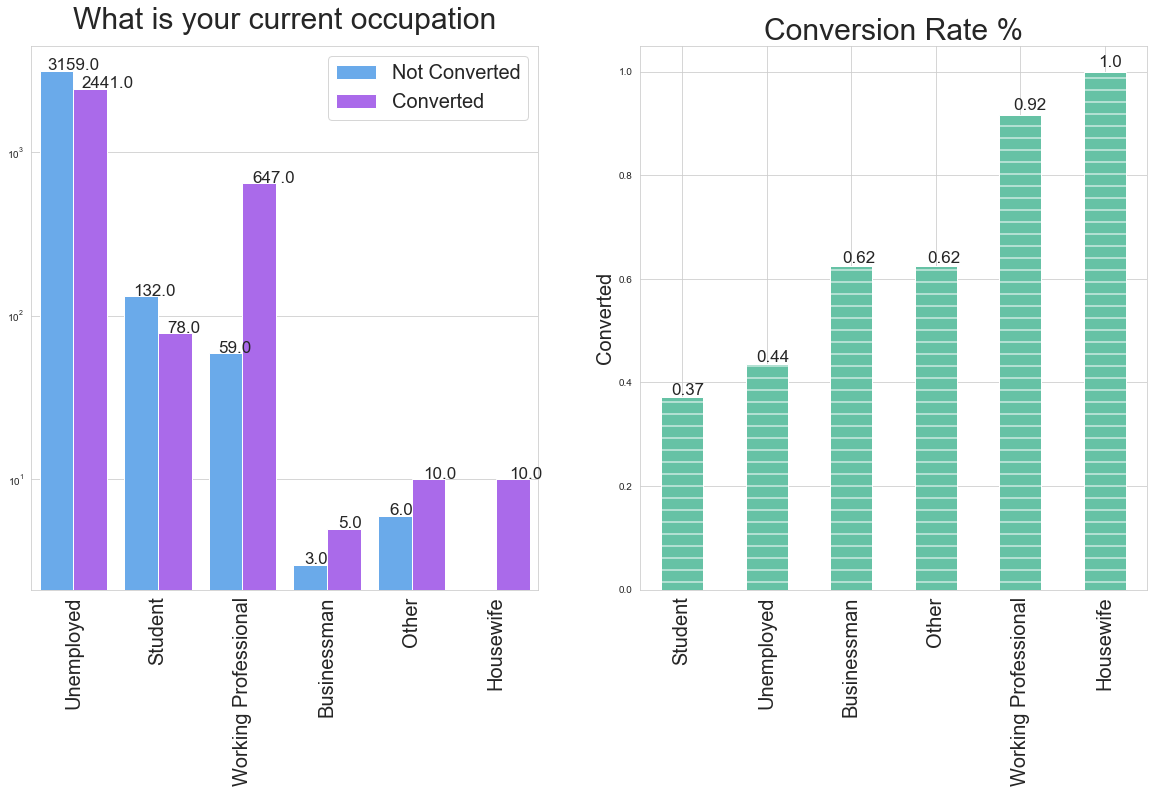

In [37]:
# Plot
univariate_1(data=leads1,x='What is your current occupation',hue='Converted',rot=90,figsize=(20,10),pal=['cool'])

In [38]:
# Treating missing values
leads1['What is your current occupation'].fillna('Other',inplace=True)

100*leads1['What is your current occupation'].value_counts(normalize=True)

Unemployed              60.606061
Other                   29.285714
Working Professional    7.640693 
Student                 2.272727 
Housewife               0.108225 
Businessman             0.086580 
Name: What is your current occupation, dtype: float64

### Lead Profile column

In [39]:
# Checking the categories of the column
leads1['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                    487 
Student of SomeSchool          241 
Lateral Student                24  
Dual Specialization Student    20  
Name: Lead Profile, dtype: int64

In [40]:
# Missing values treatment
leads1['Lead Profile'].fillna(leads1['Lead Profile'].mode()[0],inplace=True)

leads1['Lead Profile'].replace('Select',np.nan,inplace=True)

print('Missing value % in Lead Profile column : {0}%'.format(round(100*(leads1['Lead Profile'].isnull().sum()/leads1['Lead Profile'].shape[0]),2)))

Missing value % in Lead Profile column : 74.19%


### <font color=green>Observations and Comments</font>

- Leads Profile columns has a significantly higher number of missing values as the percentage is 74.19%. Hence we can drop this column as retaining it would not be a good idea.

### City Column

In [41]:
# Check the values of the city column
leads1['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

In [42]:
# Treating the Missing values
leads1['City'].fillna('Select',inplace=True)

# Replacing the select category with NaNs
leads1['City'].replace('Select',np.nan,inplace=True)

print('Missing value % in City column : ',round(100*(leads1['City'].isnull().sum()/leads1['City'].shape[0]),2))

Missing value % in City column :  39.71


### <font color=green>Observations and Comments</font>

The City column has the missing value percentage as 39.71% and it is not very much high percentage value. Hence we can retainn the column and for that we can replace the missing values with Other Cities category.

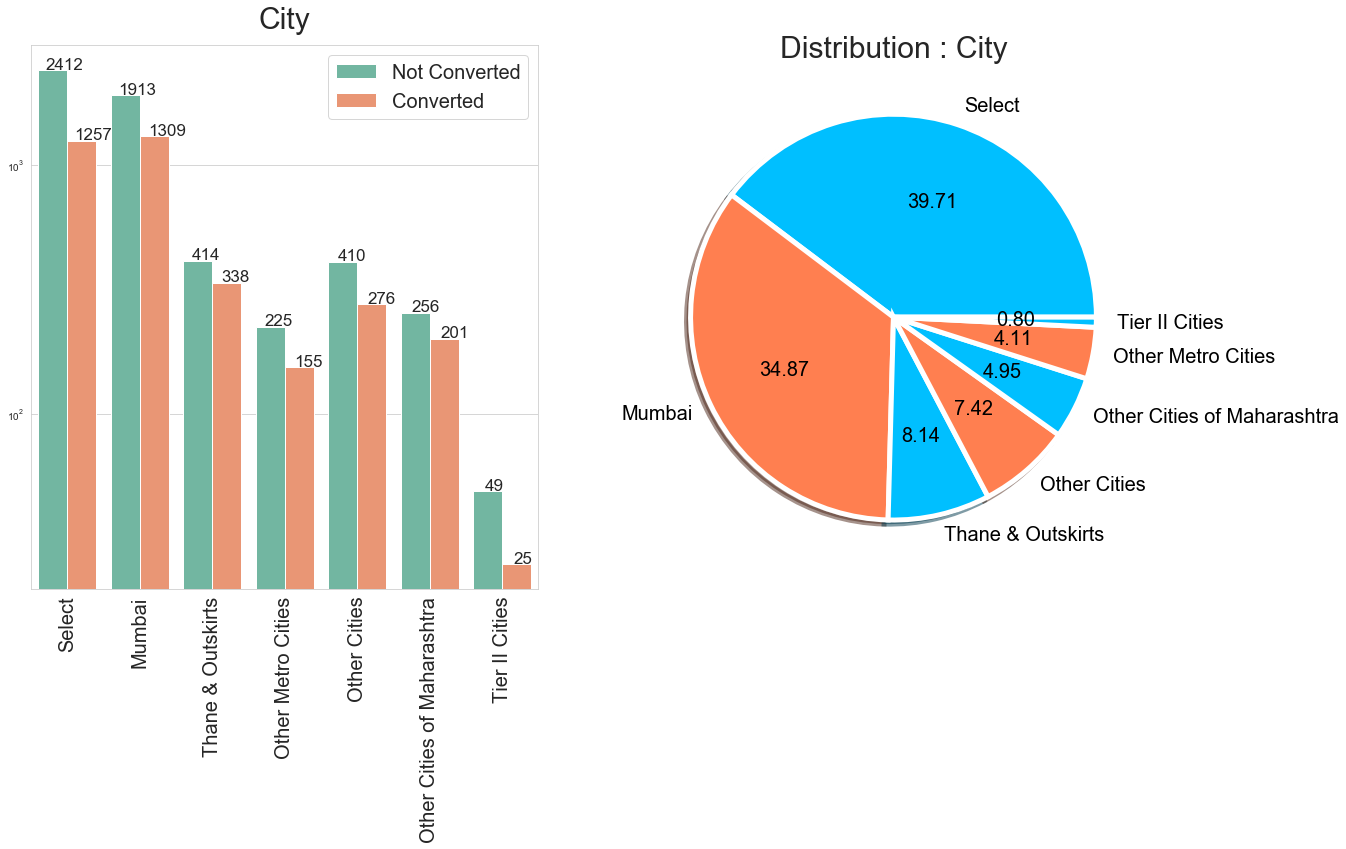

In [43]:
# Treatment for the missing values
leads1['City'].fillna('Select',inplace=True)

# Plotting the graph
univariate(data=leads1,hue='Converted',x='City',figsize=(20,10),pal=cmap)

### Country Column

In [44]:
leads1['Country'].value_counts()

India                   6492
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Bahrain                 7   
Hong Kong               7   
France                  6   
Oman                    6   
unknown                 5   
Canada                  4   
Germany                 4   
South Africa            4   
Nigeria                 4   
Kuwait                  4   
Sweden                  3   
Philippines             2   
Belgium                 2   
Uganda                  2   
Ghana                   2   
Asia/Pacific Region     2   
Bangladesh              2   
Netherlands             2   
Italy                   2   
China                   2   
Malaysia                1   
Switzerland             1   
Russia                  1   
Vietnam                 1   
Kenya                   1   
Indonesia               1   
Sri Lanka     

In [45]:
# Checking the column with city colunm
leads1[leads1['City']=='Mumbai']['Country'].value_counts()

# leads1[leads1['City']=='Other Cities of Maharashtra']['Country'].value_counts()

India                   2918
United States           30  
United Arab Emirates    17  
Saudi Arabia            7   
United Kingdom          6   
Australia               6   
Singapore               6   
Qatar                   3   
Canada                  3   
Oman                    2   
Kuwait                  2   
Hong Kong               2   
China                   1   
Netherlands             1   
Bahrain                 1   
Vietnam                 1   
Switzerland             1   
Philippines             1   
Belgium                 1   
Sweden                  1   
Germany                 1   
Name: Country, dtype: int64

### <font color=green>Observations and Comments</font>
- By checking the country column we can see clearly that the City and Country columns does not match accordingly so country column is not a good one. So we can simply drop the country column as city column is better for modelling.

### Specialization Column

In [46]:
# Check the values of the Specialization Column
leads['Specialization'].value_counts()

Select                               1942
Finance Management                   976 
Human Resource Management            848 
Marketing Management                 838 
Operations Management                503 
Business Administration              403 
IT Projects Management               366 
Supply Chain Management              349 
Banking, Investment And Insurance    338 
Travel and Tourism                   203 
Media and Advertising                203 
International Business               178 
Healthcare Management                159 
Hospitality Management               114 
E-COMMERCE                           112 
Retail Management                    100 
Rural and Agribusiness               73  
E-Business                           57  
Services Excellence                  40  
Name: Specialization, dtype: int64

In [47]:
# Handling the missing values in the Specialization Column
leads1['Specialization'].fillna('Select',inplace=True)

# Replacing the Missing values with other category
leads1['Specialization'].replace('Select',np.nan,inplace=True)

# Making a management category
leads1['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management'
                                 ,'IT Projects Management','Healthcare Management','Hospitality Management'
                                 ,'Retail Management','Supply Chain Management'],'Management',inplace=True)

# Making the business category
leads1['Specialization'].replace(['E-Business','International Business','Rural and Agribusiness','Business Administration'],'Business',inplace=True)


print('Missing value % in Specialization column : ',round(100*(leads1['Specialization'].isnull().sum()/leads1['Specialization'].shape[0]),2))

Missing value % in Specialization column :  36.58


### <font color=green>Observations and Comments</font>
- The specialization column has the missing value percentage as 36.58 and it is not that significantly high percentage value. We can make a separate category for these missing values and retain the column.

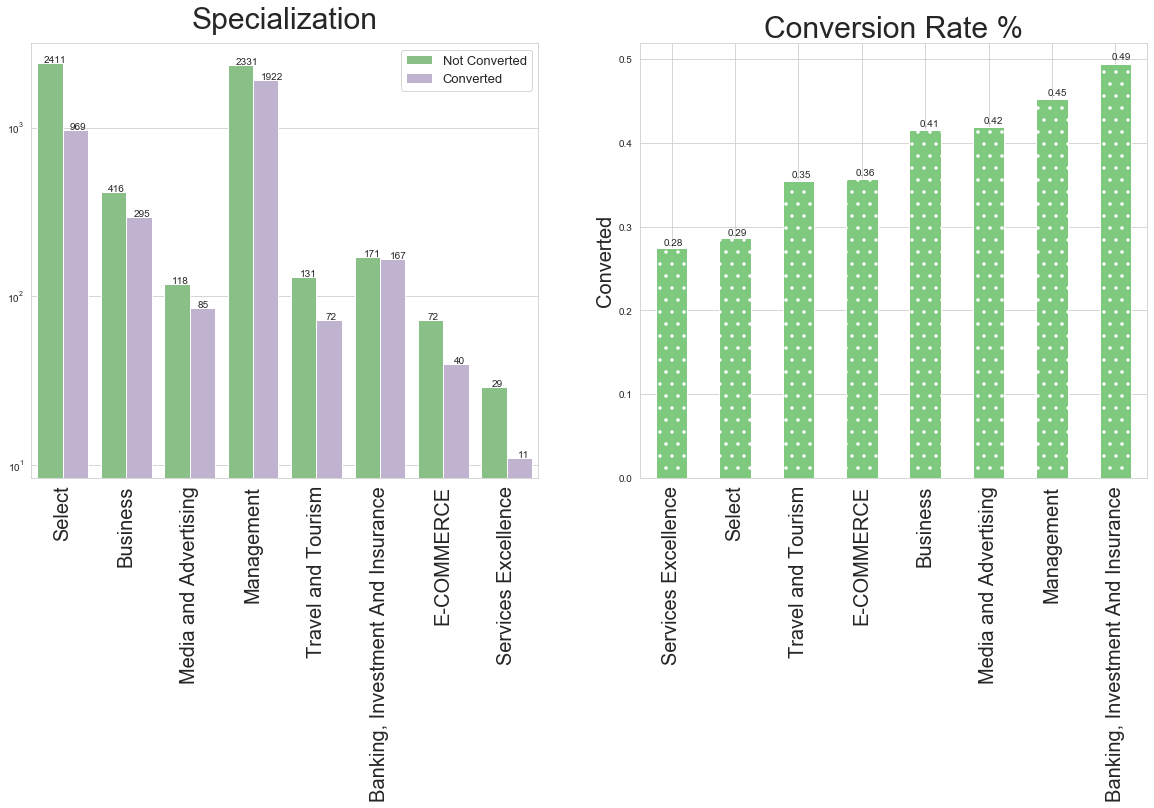

In [48]:
# Making other category for the specialization column
leads1['Specialization'].fillna('Select',inplace=True)

# Plotting the graph
univariate_1(data=leads1,hue='Converted',x='Specialization',pal=cmap,fontsize=13)

### Last Activity Column

In [49]:
# Check the values of the Last Activity Column
leads1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation         973 
Page Visited on Website         640 
Converted to Lead               428 
Email Bounced                   326 
Email Link Clicked              267 
Form Submitted on Website       116 
Unreachable                     93  
Unsubscribed                    61  
Had a Phone Conversation        30  
Approached upfront              9   
View in browser link Clicked    6   
Email Received                  2   
Email Marked Spam               2   
Resubscribed to emails          1   
Visited Booth in Tradeshow      1   
Name: Last Activity, dtype: int64

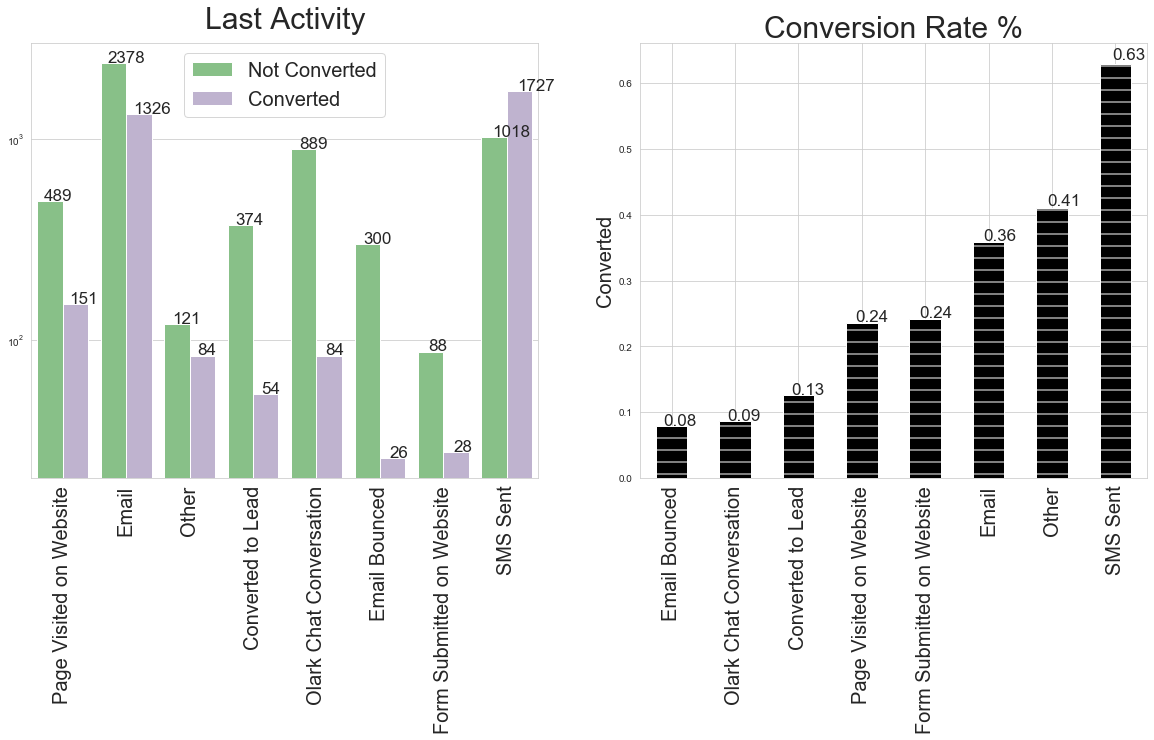

In [50]:
# Making a new category
leads1['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',      
                                'View in browser link Clicked','Email Received','Approached upfront',
                                 'Email Marked Spam','Visited Booth in Tradeshow',
                                 'Resubscribed to emails'],'Other',inplace=True)
leads1['Last Activity'].replace(['Email Link Clicked','Email Opened'],'Email',inplace=True)

univariate_1(data=leads1,hue='Converted',x='Last Activity',loc='best',pal=cmap)

### Converted Column

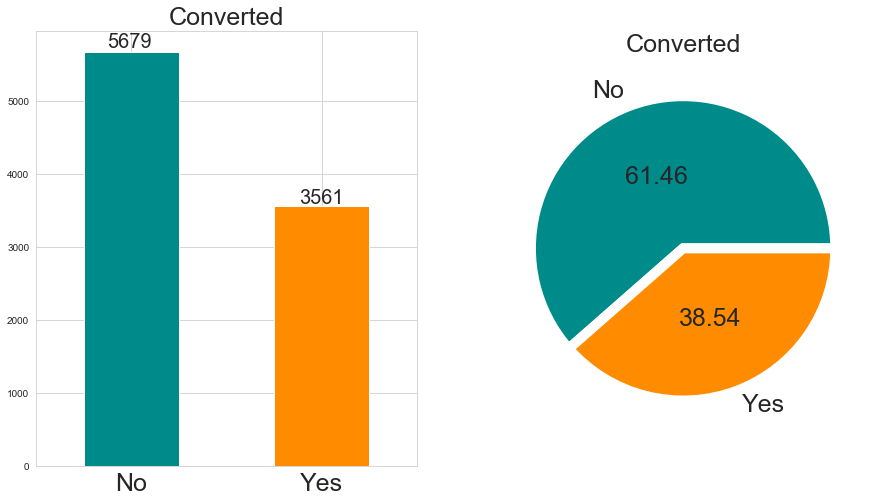

In [51]:
# Visualizing the Converted Column

plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
plt.pie(x=leads1['converted'.title()].value_counts(),pctdistance=0.5,colors=['darkcyan','darkorange'],
        autopct='%.2f',labels=['No','Yes'],textprops={'fontsize':25},wedgeprops={'linewidth':10})
plt.title('Converted',fontsize=25)
plt.subplot(1,2,1)
ax=leads1['converted'.title()].value_counts().plot.bar(color=['darkcyan','darkorange'])
for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()*1.01+i.get_width()/4,i.get_height()*1.01),fontsize=20)
plt.title('Converted',fontsize=25)
plt.xticks(ticks=[0,1],labels=['No','Yes'],fontsize=25,rotation=0)
plt.show()

### TotalVisits Column

In [52]:
leads1 = leads1[~leads1['TotalVisits'].isna()]

### <font color=green>Observations and Comments</font>
The number of missing values in the TotalVisits column are significantly low so we can drop those records.

## Numerical Columns

In [53]:
# Skewness in the data
leads1.skew()

Lead Number                    0.144528 
Converted                      0.493639 
TotalVisits                    19.911657
Total Time Spent on Website    0.974876 
Page Views Per Visit           2.871793 
dtype: float64

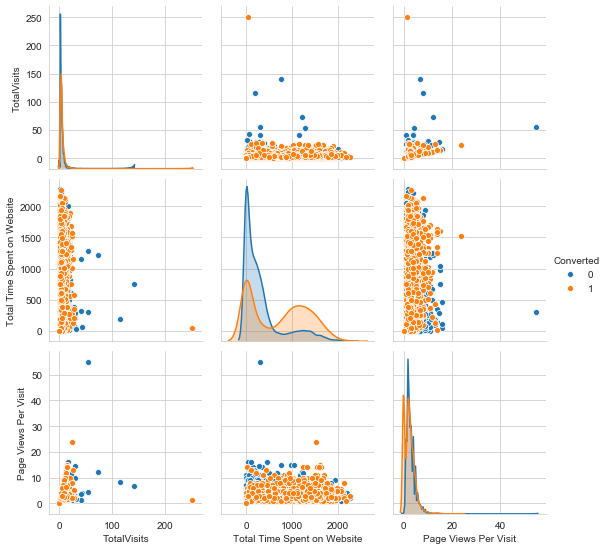

In [54]:
# Plotting the pairplot
sns.pairplot(leads1[['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']],diag_kind='kde',hue='Converted')
plt.show()

### <font color=green>Observations and Comments</font>

- In columns like TotalVisits, Total Time Spent on Website, Page Views Per Visi, the data is right skewed. So we can use the power transformer technique to rectify this issue.

In [55]:
# Using Power Tranformer

cols=['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

x=leads1[cols]

pt = PowerTransformer()

x=pt.fit_transform(x[x.columns[1:]])
x

array([[-1.45790658, -1.46544326, -1.45470619],
       [ 0.74791821,  0.74130532,  0.30853415],
       [-0.1416363 ,  1.31172173,  0.06557378],
       ...,
       [-0.1416363 ,  0.06299623,  0.06557378],
       [ 0.22181451,  0.55685579,  0.5254868 ],
       [ 0.95227752,  1.17738857,  0.5254868 ]])

In [56]:
# Checking the transformed values
leads1[cols[1:]]=x

leads1[cols]

Converted  TotalVisits  Total Time Spent on Website  \
0     0         -1.457907    -1.465443                      
1     0          0.747918     0.741305                      
2     1         -0.141636     1.311722                      
3     0         -0.640428     0.279956                      
4     1         -0.141636     1.258770                      
...  ..               ...          ...                      
9235  1          1.290687     1.455743                      
9236  0         -0.141636     0.151436                      
9237  0         -0.141636     0.062996                      
9238  1          0.221815     0.556856                      
9239  1          0.952278     1.177389                      

      Page Views Per Visit  
0    -1.454706              
1     0.308534              
2     0.065574              
3    -0.536967              
4    -0.536967              
...        ...              
9235  0.384893              
9236  0.065574              
9237  0.065574              
9238  0.525487              
9239  0.525487              

[9103 rows x 4 columns]

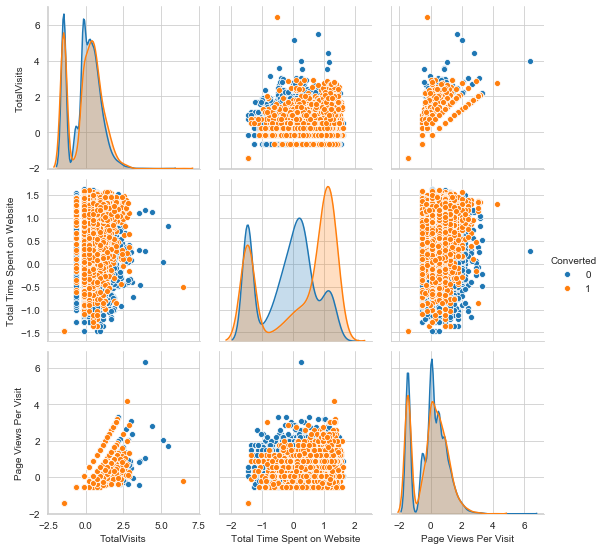

In [57]:
sns.pairplot(leads1[cols],diag_kind='kde',hue='Converted')

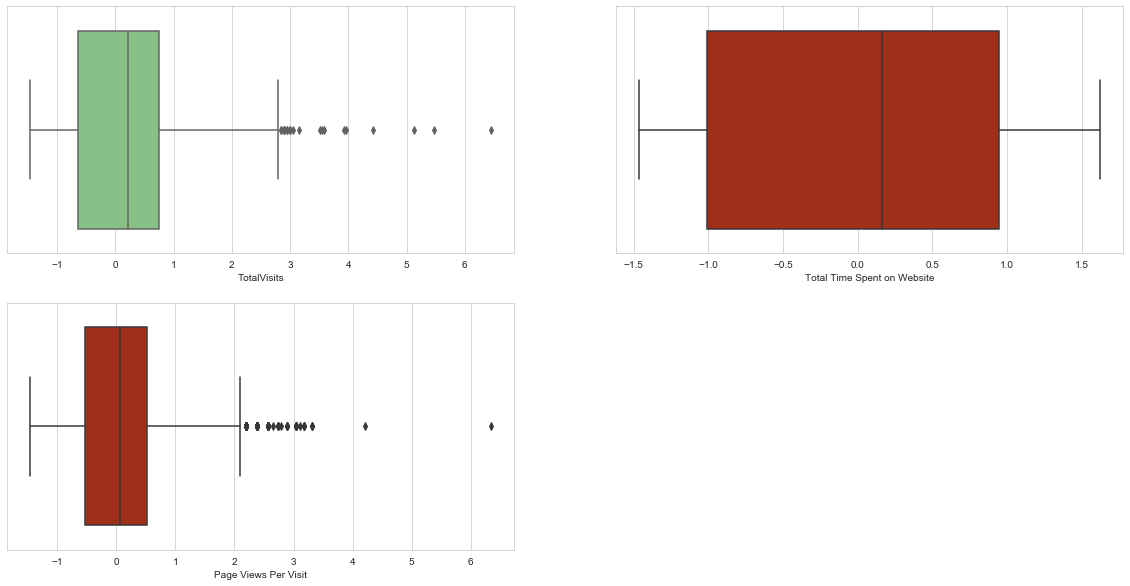

In [58]:
# Checking the outliers again
cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(20,10))
for i,j in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=leads1,x=j,palette=rd.choice(cmap))
plt.show()


# Correlations

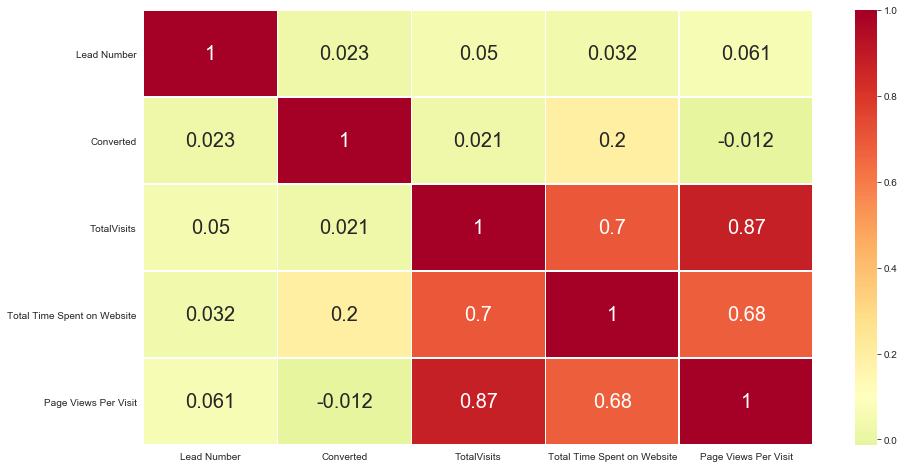

In [59]:
# Removing the Lead Number then checking the correlation values

plt.figure(figsize=(15,8))
sns.heatmap(data=leads1.corr(),annot=True,linewidths=0.5,cmap='RdYlGn_r',center=0.1,annot_kws={'fontsize':20})
plt.show()

In [60]:
# Correlation values
corr = leads1[leads1.columns[2:]].corr().round(2).abs()
matrix = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
corr = pd.DataFrame(matrix,columns=['Correlations'])
corr = corr.reset_index()
corr

level_0                      level_1  Correlations
0  TotalVisits                  Page Views Per Visit         0.87        
1  TotalVisits                  Total Time Spent on Website  0.70        
2  Total Time Spent on Website  Page Views Per Visit         0.68        
3  Converted                    Total Time Spent on Website  0.20        
4  Converted                    TotalVisits                  0.02        
5  Converted                    Page Views Per Visit         0.01

# Step 4: Preparing Data for Modelling 

In [61]:
# Dropping the columns which are not required for the modelling

columns_to_drop = ['Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course',
       'Receive More Updates About Our Courses','How did you hear about X Education','Country',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
        'Last Notable Activity','Lead Profile']

leads1.drop(columns=columns_to_drop,inplace=True)

In [62]:
leads1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0  Olark Chat      No           0         -1.457907      
1  Organic Search  No           0          0.747918      
2  Direct Traffic  No           1         -0.141636      
3  Direct Traffic  No           0         -0.640428      
4  Google          No           1         -0.141636      

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0 -1.465443                    -1.454706              Page Visited on Website   
1  0.741305                     0.308534              Email                     
2  1.311722                     0.065574              Email                     
3  0.279956                    -0.536967              Other                     
4  1.258770                    -0.536967              Converted to Lead         

          Specialization What is your current occupation    City  \
0  Select                 Unemployed                      Select   
1  Select                 Unemployed                      Select   
2  Business               Student                         Mumbai   
3  Media and Advertising  Unemployed                      Mumbai   
4  Select                 Unemployed                      Mumbai   

  A free copy of Mastering The Interview  
0  No                                     
1  No                                     
2  Yes                                    
3  No                                     
4  No

In [63]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   float64
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

In [64]:
# Changing the Index with the Lead Number Column
leads1.drop(columns='Lead Number',inplace=True)
leads1.index = leads1.pop('Prospect ID')
leads1.head()

Lead Origin     Lead Source  \
Prospect ID                                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620  API                      Olark Chat       
2a272436-5132-4136-86fa-dcc88c88f482  API                      Organic Search   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission  Direct Traffic   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission  Direct Traffic   
3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission  Google           

                                     Do Not Email  Converted  TotalVisits  \
Prospect ID                                                                 
7927b2df-8bba-4d29-b9a2-b6e0beafe620  No           0         -1.457907      
2a272436-5132-4136-86fa-dcc88c88f482  No           0          0.747918      
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  No           1         -0.141636      
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  No           0         -0.640428      
3256f628-e534-4826-9d63-4a8b88782852  No           1         -0.141636      

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620 -1.465443                      
2a272436-5132-4136-86fa-dcc88c88f482  0.741305                      
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  1.311722                      
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  0.279956                      
3256f628-e534-4826-9d63-4a8b88782852  1.258770                      

                                      Page Views Per Visit  \
Prospect ID                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620 -1.454706               
2a272436-5132-4136-86fa-dcc88c88f482  0.308534               
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  0.065574               
0cc2df48-7cf4-4e39-9de9-19797f9b38cc -0.536967               
3256f628-e534-4826-9d63-4a8b88782852 -0.536967               

                                                Last Activity  \
Prospect ID                                                     
7927b2df-8bba-4d29-b9a2-b6e0beafe620  Page Visited on Website   
2a272436-5132-4136-86fa-dcc88c88f482  Email                     
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Email                     
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Other                     
3256f628-e534-4826-9d63-4a8b88782852  Converted to Lead         

                                             Specialization  \
Prospect ID                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620  Select                  
2a272436-5132-4136-86fa-dcc88c88f482  Select                  
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Business                
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Media and Advertising   
3256f628-e534-4826-9d63-4a8b88782852  Select                  

                                     What is your current occupation    City  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620  Unemployed                      Select   
2a272436-5132-4136-86fa-dcc88c88f482  Unemployed                      Select   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Student                         Mumbai   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Unemployed                      Mumbai   
3256f628-e534-4826-9d63-4a8b88782852  Unemployed                      Mumbai   

                                     A free copy of Mastering The Interview  
Prospect ID                                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620  No                                     
2a272436-5132-4136-86fa-dcc88c88f482  No                                     
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Yes                                    
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  No                                     
3256f628-e534-4826-9d63-4a8b88782852  No

## Creating Dummies

In [65]:
# Creating the dummies
leads2 = pd.get_dummies(leads1)

leads2.head()

Converted  TotalVisits  \
Prospect ID                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620  0         -1.457907      
2a272436-5132-4136-86fa-dcc88c88f482  0          0.747918      
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  1         -0.141636      
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  0         -0.640428      
3256f628-e534-4826-9d63-4a8b88782852  1         -0.141636      

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620 -1.465443                      
2a272436-5132-4136-86fa-dcc88c88f482  0.741305                      
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  1.311722                      
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  0.279956                      
3256f628-e534-4826-9d63-4a8b88782852  1.258770                      

                                      Page Views Per Visit  Lead Origin_API  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620 -1.454706              1                 
2a272436-5132-4136-86fa-dcc88c88f482  0.308534              1                 
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  0.065574              0                 
0cc2df48-7cf4-4e39-9de9-19797f9b38cc -0.536967              0                 
3256f628-e534-4826-9d63-4a8b88782852 -0.536967              0                 

                                      Lead Origin_Landing Page Submission  \
Prospect ID                                                                 
7927b2df-8bba-4d29-b9a2-b6e0beafe620  0                                     
2a272436-5132-4136-86fa-dcc88c88f482  0                                     
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  1                                     
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  1                                     
3256f628-e534-4826-9d63-4a8b88782852  1                                     

                                      Lead Origin_Other  \
Prospect ID                                               
7927b2df-8bba-4d29-b9a2-b6e0beafe620  0                   
2a272436-5132-4136-86fa-dcc88c88f482  0                   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  0                   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  0                   
3256f628-e534-4826-9d63-4a8b88782852  0                   

                                      Lead Source_Direct Traffic  \
Prospect ID                                                        
7927b2df-8bba-4d29-b9a2-b6e0beafe620  0                            
2a272436-5132-4136-86fa-dcc88c88f482  0                            
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  1                            
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  1                            
3256f628-e534-4826-9d63-4a8b88782852  0                            

                                      Lead Source_Google  \
Prospect ID                                                
7927b2df-8bba-4d29-b9a2-b6e0beafe620  0                    
2a272436-5132-4136-86fa-dcc88c88f482  0                    
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  0                    
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  0                    
3256f628-e534-4826-9d63-4a8b88782852  1                    

                                      Lead Source_Olark Chat  \
Prospect ID                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620  1                        
2a272436-5132-4136-86fa-dcc88c88f482  0                        
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  0                        
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  0                        
3256f628-e534-4826-9d63-4a8b88782852  0                        

                                      Lead Source_Organic Search  \
Prospect ID                                                        
7927b2df-8bba-4d29-b9a2-b6e0beafe620  0                            
2a272436-5132-4136-86fa-dcc88c88f482  1       

In [66]:
# Dropping the unecessary columns

cols=['Specialization_Select','City_Select','A free copy of Mastering The Interview_No','Lead Origin_Other','Lead Source_Other','Do Not Email_No','What is your current occupation_Other','Last Activity_Other']

leads2.drop(columns=cols,inplace=True)

leads2.shape

(9103, 39)

## Correlations

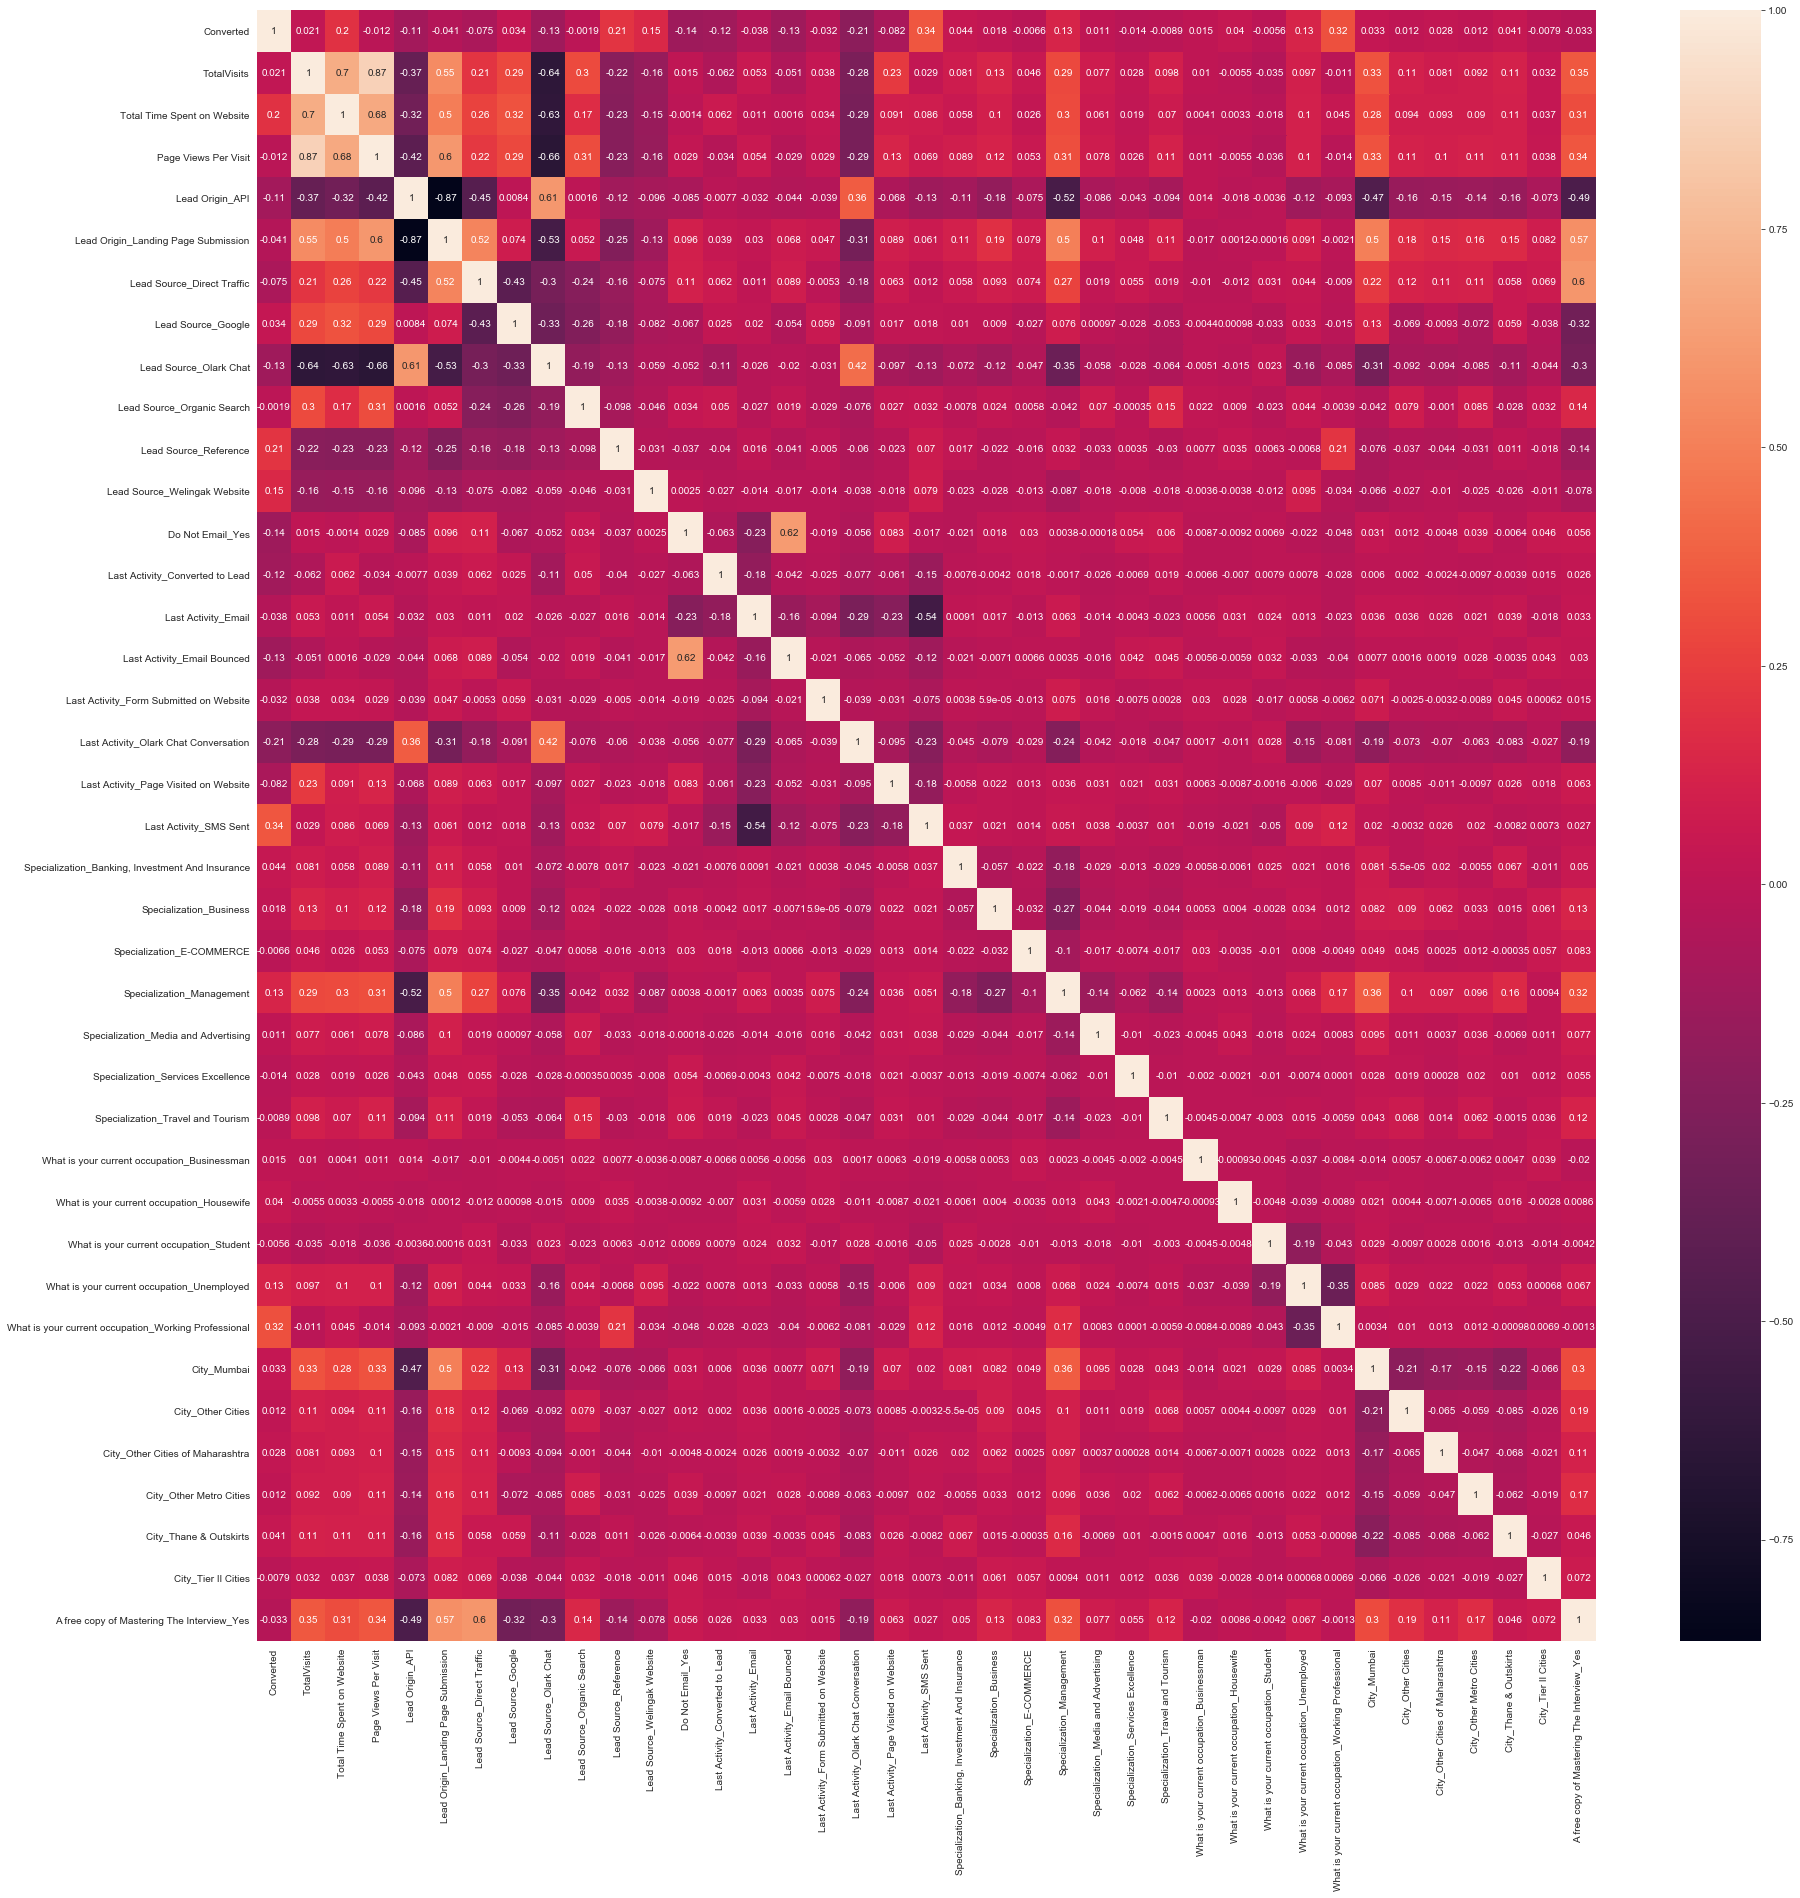

In [67]:
# Correlations check
plt.figure(figsize=(30,30))
sns.heatmap(leads2.corr(),annot=True)
plt.show()

In [68]:
# Conversion Rate

conv_rate = round(100*(leads2['Converted'].sum()/leads2.shape[0]),2)

print('Lead Conversion Rate : {0}%'.format(conv_rate))

Lead Conversion Rate : 38.02%


# Step 5: Train and Test Split

In [69]:
# Splitting the data into train and test
y=leads2.pop('Converted')
x=leads2

# Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,train_size=0.7)

In [70]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6372, 38)
(6372,)
(2731, 38)
(2731,)


# Step 6: Building the Model

In [71]:
# Function for building 
def logmodel(x_train,y_train):
    
    x_train_sm = sm.add_constant(x_train)
    
    logregg = sm.GLM(y_train,x_train_sm,sm.families.Binomial()).fit()
    
    return logregg,x_train_sm

In [72]:
# VIF Function
def vif(x=None):
    vif = pd.DataFrame(columns=['Feature','VIF'])
    vif.Feature = x.columns
    vif.VIF = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [73]:
# Model 1
logregg1,x_sm1 = logmodel(x_train,y_train)

logregg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.3
Date:                Mon, 23 Nov 2020   Deviance:                       5242.6
Time:                        22:11:29   Pearson chi2:                 6.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4325      0.485      0.892      0.373      -0.518       1.383
TotalVisits                                              0.3176      0.075      4.223      0.000       0.170       0.465
Total Time Spent on Website                              1.4890      0.063     23.597      0.000       1.365       1.613
Page Views Per Visit                                    -0.5083      0.078     -6.510      0.000      -0.661      -0.355
Lead Origin_API                                         -4.3695      0.379    -11.516      0.000      -5.113      -3.626
Lead Origin_Landing Page Submission                     -5.0083      0.390    -12.850      0.000      -5.772      -4.244
Lead Source_Direct Traffic                               1.8281      0.506      3.611      0.000       0.836       2.820
Lead Source_Google                                       1.9829      0.497      3.993      0.000       1.010       2.956
Lead Source_Olark Chat                                   4.2385      0.530      8.004      0.000       3.201       5.276
Lead Source_Organic Search                               1.9918      0.506      3.937      0.000       1.000       2.983
Lead Source_Reference                                    1.8906      0.438      4.318      0.000       1.033       2.749
Lead Source_Welingak Website                             4.2992      0.830      5.179      0.000       2.672       5.926
Do Not Email_Yes                                        -1.2754      0.193     -6.611      0.000      -1.654      -0.897
Last Activity_Converted to Lead                         -1.9518      0.296     -6.593      0.000      -2.532      -1.372
Last Activity_Email                                     -0.6068      0.217     -2.795      0.005      -1.032      -0.181
Last Activity_Email Bounced                             -1.3901      0.399     -3.487      0.000      -2.171      -0.609
Last Activity_Form Submitted on Website                 -1.6146      0.383     -4.221      0.000      -2.364      -0.865
Last Activity_Olark Chat Conversation                   -2.0192      0.268     -7.542      0.000      -2.544      -1.494
Last Activity_Page Visited on Website                   -1.1967      0.255     -4.701      0.000      -1.696      -0.698
Last Activity_SMS Sent                                   0.6048      0.216      2.796      0.005       0.181       1.029
Specialization_Banking, Investment And Insurance         0.8250      0.227      3.633      0.000       0.380       1.270
Specialization_Business                                  0.6418      0.192      3.335      0.001       0.265       1.019
Specialization_E-COMMERCE                                0

In [74]:
vif(x)

Feature        VIF
4   Lead Origin_Landing Page Submission                   48.712781
6   Lead Source_Google                                    35.231769
3   Lead Origin_API                                       33.325272
5   Lead Source_Direct Traffic                            33.290648
7   Lead Source_Olark Chat                                28.587378
13  Last Activity_Email                                   17.302321
8   Lead Source_Organic Search                            14.504938
18  Last Activity_SMS Sent                                12.824232
22  Specialization_Management                             9.782003 
31  City_Mumbai                                           8.572078 
16  Last Activity_Olark Chat Conversation                 5.590896 
2   Page Views Per Visit                                  5.446492 
0   TotalVisits                                           5.384530 
9   Lead Source_Reference                                 4.351073 
17  Last Activity_Page Visited on Website                 3.723465 
29  What is your current occupation_Unemployed            3.345648 
37  A free copy of Mastering The Interview_Yes            3.267829 
12  Last Activity_Converted to Lead                       3.094357 
14  Last Activity_Email Bounced                           2.770009 
1   Total Time Spent on Website                           2.694598 
35  City_Thane & Outskirts                                2.629723 
32  City_Other Cities                                     2.553434 
20  Specialization_Business                               2.491576 
33  City_Other Cities of Maharashtra                      2.024239 
34  City_Other Metro Cities                               1.956885 
11  Do Not Email_Yes                                      1.934956 
10  Lead Source_Welingak Website                          1.717341 
19  Specialization_Banking, Investment And Insurance      1.699733 
15  Last Activity_Form Submitted on Website               1.538994 
30  What is your current occupation_Working Professional  1.534664 
25  Specialization_Travel and Tourism                     1.498901 
23  Specialization_Media and Advertising                  1.468305 
21  Specialization_E-COMMERCE                             1.265537 
36  City_Tier II Cities                                   1.204473 
24  Specialization_Services Excellence                    1.099014 
28  What is your current occupation_Student               1.092831 
27  What is your current occupation_Housewife             1.012665 
26  What is your current occupation_Businessman           1.011156

# Step 7: RFE Approach for feature selection

In [75]:
# Using RFE method
lrm = LogisticRegression()

rfe = RFE(lrm,15).fit(x_train,y_train)

rfe_df = pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),columns=['Feature','Support','Ranking'])

rfe_df

Feature  Support  Ranking
0   TotalVisits                                           False    14     
1   Total Time Spent on Website                           True     1      
2   Page Views Per Visit                                  False    12     
3   Lead Origin_API                                       True     1      
4   Lead Origin_Landing Page Submission                   True     1      
5   Lead Source_Direct Traffic                            False    21     
6   Lead Source_Google                                    False    15     
7   Lead Source_Olark Chat                                True     1      
8   Lead Source_Organic Search                            False    16     
9   Lead Source_Reference                                 False    3      
10  Lead Source_Welingak Website                          True     1      
11  Do Not Email_Yes                                      True     1      
12  Last Activity_Converted to Lead                       True     1      
13  Last Activity_Email                                   False    11     
14  Last Activity_Email Bounced                           True     1      
15  Last Activity_Form Submitted on Website               False    2      
16  Last Activity_Olark Chat Conversation                 True     1      
17  Last Activity_Page Visited on Website                 False    5      
18  Last Activity_SMS Sent                                True     1      
19  Specialization_Banking, Investment And Insurance      False    6      
20  Specialization_Business                               False    7      
21  Specialization_E-COMMERCE                             False    13     
22  Specialization_Management                             False    8      
23  Specialization_Media and Advertising                  False    10     
24  Specialization_Services Excellence                    False    4      
25  Specialization_Travel and Tourism                     False    9      
26  What is your current occupation_Businessman           True     1      
27  What is your current occupation_Housewife             True     1      
28  What is your current occupation_Student               True     1      
29  What is your current occupation_Unemployed            True     1      
30  What is your current occupation_Working Professional  True     1      
31  City_Mumbai                                           False    20     
32  City_Other Cities                                     False    24     
33  City_Other Cities of Maharashtra                      False    22     
34  City_Other Metro Cities                               False    18     
35  City_Thane & Outskirts                                False    19     
36  City_Tier II Cities                                   False    23     
37  A free copy of Mastering The Interview_Yes            False    17

In [76]:
# Top 20 ranked columns

columns = x_train.columns[rfe.support_]

columns

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [77]:
# Columns with ranking more than 20
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Last Activity_Email',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business', 'Specialization_E-COMMERCE',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'City_Mumbai', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

In [78]:
vif(x_train[columns])

Feature       VIF
1   Lead Origin_API                                       3.353947
3   Lead Source_Olark Chat                                3.331618
2   Lead Origin_Landing Page Submission                   2.969322
13  What is your current occupation_Unemployed            2.793071
0   Total Time Spent on Website                           2.059175
5   Do Not Email_Yes                                      1.806803
7   Last Activity_Email Bounced                           1.748149
9   Last Activity_SMS Sent                                1.595851
8   Last Activity_Olark Chat Conversation                 1.479105
14  What is your current occupation_Working Professional  1.195310
4   Lead Source_Welingak Website                          1.127641
6   Last Activity_Converted to Lead                       1.110176
12  What is your current occupation_Student               1.053728
11  What is your current occupation_Housewife             1.003471
10  What is your current occupation_Businessman           1.003148

In [79]:
# Model 2
x = x_train[columns]

logregg2,x_sm2 = logmodel(x,y_train)

logregg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.8
Date:                Mon, 23 Nov 2020   Deviance:                       5381.7
Time:                        22:11:35   Pearson chi2:                 6.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1198      0.210     10.104      0.000       1.709       2.531
Total Time Spent on Website                              1.5216      0.061     24.841      0.000       1.402       1.642
Lead Origin_API                                         -4.6298      0.226    -20.479      0.000      -5.073      -4.187
Lead Origin_Landing Page Submission                     -4.9090      0.219    -22.428      0.000      -5.338      -4.480
Lead Source_Olark Chat                                   2.5902      0.164     15.803      0.000       2.269       2.911
Lead Source_Welingak Website                             2.3005      0.745      3.086      0.002       0.840       3.761
Do Not Email_Yes                                        -1.2419      0.184     -6.754      0.000      -1.602      -0.882
Last Activity_Converted to Lead                         -1.2731      0.206     -6.185      0.000      -1.677      -0.870
Last Activity_Email Bounced                             -0.7435      0.351     -2.119      0.034      -1.431      -0.056
Last Activity_Olark Chat Conversation                   -1.3717      0.165     -8.295      0.000      -1.696      -1.048
Last Activity_SMS Sent                                   1.2126      0.074     16.345      0.000       1.067       1.358
What is your current occupation_Businessman              2.0379      0.999      2.040      0.041       0.080       3.995
What is your current occupation_Housewife               24.7173   1.59e+04      0.002      0.999    -3.1e+04    3.11e+04
What is your current occupation_Student                  1.3862      0.236      5.876      0.000       0.924       1.849
What is your current occupation_Unemployed               1.2286      0.086     14.286      0.000       1.060       1.397
What is your current occupation_Working Professional     3.8053      0.198     19.225      0.000       3.417       4.193
========================================================================================================================
"""

### <font color='green'>Observations and Comments :</font>
By looking the p-values of the model 2, `What is your current occupation_Housewife` feature has the p-value is 0.999 which is greater than the significance level of 5%. So we will remove this feature manually.

In [80]:
# VIF values
vif(x)

Feature       VIF
1   Lead Origin_API                                       3.353947
3   Lead Source_Olark Chat                                3.331618
2   Lead Origin_Landing Page Submission                   2.969322
13  What is your current occupation_Unemployed            2.793071
0   Total Time Spent on Website                           2.059175
5   Do Not Email_Yes                                      1.806803
7   Last Activity_Email Bounced                           1.748149
9   Last Activity_SMS Sent                                1.595851
8   Last Activity_Olark Chat Conversation                 1.479105
14  What is your current occupation_Working Professional  1.195310
4   Lead Source_Welingak Website                          1.127641
6   Last Activity_Converted to Lead                       1.110176
12  What is your current occupation_Student               1.053728
11  What is your current occupation_Housewife             1.003471
10  What is your current occupation_Businessman           1.003148

In [81]:
# Model 3
x.drop(columns='What is your current occupation_Housewife',inplace=True)

logregg3,x_sm3 = logmodel(x,y_train)

logregg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.9
Date:                Mon, 23 Nov 2020   Deviance:                       5405.8
Time:                        22:11:36   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1670      0.209     10.355      0.000       1.757       2.577
Total Time Spent on Website                              1.5192      0.061     24.867      0.000       1.400       1.639
Lead Origin_API                                         -4.6427      0.226    -20.552      0.000      -5.085      -4.200
Lead Origin_Landing Page Submission                     -4.9154      0.219    -22.475      0.000      -5.344      -4.487
Lead Source_Olark Chat                                   2.5802      0.164     15.778      0.000       2.260       2.901
Lead Source_Welingak Website                             2.2884      0.745      3.070      0.002       0.827       3.749
Do Not Email_Yes                                        -1.2449      0.184     -6.779      0.000      -1.605      -0.885
Last Activity_Converted to Lead                         -1.2825      0.206     -6.237      0.000      -1.686      -0.879
Last Activity_Email Bounced                             -0.7498      0.351     -2.138      0.033      -1.437      -0.063
Last Activity_Olark Chat Conversation                   -1.3791      0.165     -8.349      0.000      -1.703      -1.055
Last Activity_SMS Sent                                   1.2005      0.074     16.224      0.000       1.056       1.346
What is your current occupation_Businessman              2.0029      1.000      2.003      0.045       0.043       3.963
What is your current occupation_Student                  1.3532      0.236      5.742      0.000       0.891       1.815
What is your current occupation_Unemployed               1.1969      0.085     14.047      0.000       1.030       1.364
What is your current occupation_Working Professional     3.7723      0.198     19.097      0.000       3.385       4.160
========================================================================================================================
"""

### <font color=green>Observations and Comments : </font>
- According to the p-values the feature what is your current occupation_Businessman has p-values near to significance level value 0.05. Hence we will remove this feature.

In [82]:
# VIF values
vif(x)

Feature       VIF
1   Lead Origin_API                                       3.349456
3   Lead Source_Olark Chat                                3.331098
2   Lead Origin_Landing Page Submission                   2.960193
12  What is your current occupation_Unemployed            2.788790
0   Total Time Spent on Website                           2.059077
5   Do Not Email_Yes                                      1.806706
7   Last Activity_Email Bounced                           1.748113
9   Last Activity_SMS Sent                                1.595474
8   Last Activity_Olark Chat Conversation                 1.478902
13  What is your current occupation_Working Professional  1.194963
4   Lead Source_Welingak Website                          1.127492
6   Last Activity_Converted to Lead                       1.110009
11  What is your current occupation_Student               1.053606
10  What is your current occupation_Businessman           1.003142

In [83]:
# Model 4
x=x.drop(columns='What is your current occupation_Businessman')

logregg4,x_sm4 = logmodel(x,y_train)

logregg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.8
Date:                Mon, 23 Nov 2020   Deviance:                       5409.6
Time:                        22:11:37   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1887      0.209     10.468      0.000       1.779       2.598
Total Time Spent on Website                              1.5183      0.061     24.861      0.000       1.399       1.638
Lead Origin_API                                         -4.6499      0.226    -20.568      0.000      -5.093      -4.207
Lead Origin_Landing Page Submission                     -4.9255      0.219    -22.507      0.000      -5.354      -4.497
Lead Source_Olark Chat                                   2.5740      0.163     15.746      0.000       2.254       2.894
Lead Source_Welingak Website                             2.2778      0.745      3.056      0.002       0.817       3.739
Do Not Email_Yes                                        -1.2458      0.184     -6.785      0.000      -1.606      -0.886
Last Activity_Converted to Lead                         -1.2853      0.206     -6.252      0.000      -1.688      -0.882
Last Activity_Email Bounced                             -0.7511      0.351     -2.142      0.032      -1.438      -0.064
Last Activity_Olark Chat Conversation                   -1.3790      0.165     -8.350      0.000      -1.703      -1.055
Last Activity_SMS Sent                                   1.1971      0.074     16.189      0.000       1.052       1.342
What is your current occupation_Student                  1.3421      0.236      5.697      0.000       0.880       1.804
What is your current occupation_Unemployed               1.1862      0.085     13.978      0.000       1.020       1.353
What is your current occupation_Working Professional     3.7615      0.197     19.057      0.000       3.375       4.148
========================================================================================================================
"""

In [84]:
# VIF values
vif(x=x)

Feature       VIF
1   Lead Origin_API                                       3.340505
3   Lead Source_Olark Chat                                3.328547
2   Lead Origin_Landing Page Submission                   2.955944
11  What is your current occupation_Unemployed            2.785628
0   Total Time Spent on Website                           2.058231
5   Do Not Email_Yes                                      1.806646
7   Last Activity_Email Bounced                           1.748101
9   Last Activity_SMS Sent                                1.595326
8   Last Activity_Olark Chat Conversation                 1.478889
12  What is your current occupation_Working Professional  1.194732
4   Lead Source_Welingak Website                          1.127451
6   Last Activity_Converted to Lead                       1.109887
10  What is your current occupation_Student               1.053510

In [85]:
# Model 5
x=x.drop(columns='Last Activity_Email Bounced')

logregg5,x_sm5 = logmodel(x,y_train)

logregg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2707.3
Date:                Mon, 23 Nov 2020   Deviance:                       5414.7
Time:                        22:11:37   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1980      0.209     10.498      0.000       1.788       2.608
Total Time Spent on Website                              1.5198      0.061     24.891      0.000       1.400       1.639
Lead Origin_API                                         -4.6698      0.226    -20.644      0.000      -5.113      -4.226
Lead Origin_Landing Page Submission                     -4.9468      0.219    -22.590      0.000      -5.376      -4.518
Lead Source_Olark Chat                                   2.5721      0.163     15.741      0.000       2.252       2.892
Lead Source_Welingak Website                             2.2605      0.742      3.045      0.002       0.806       3.715
Do Not Email_Yes                                        -1.4591      0.159     -9.160      0.000      -1.771      -1.147
Last Activity_Converted to Lead                         -1.2742      0.205     -6.202      0.000      -1.677      -0.871
Last Activity_Olark Chat Conversation                   -1.3646      0.165     -8.267      0.000      -1.688      -1.041
Last Activity_SMS Sent                                   1.2218      0.073     16.672      0.000       1.078       1.365
What is your current occupation_Student                  1.3372      0.235      5.689      0.000       0.876       1.798
What is your current occupation_Unemployed               1.1867      0.085     13.977      0.000       1.020       1.353
What is your current occupation_Working Professional     3.7523      0.196     19.103      0.000       3.367       4.137
========================================================================================================================
"""

In [86]:
vif(x)

Feature       VIF
1   Lead Origin_API                                       3.332738
3   Lead Source_Olark Chat                                3.327407
2   Lead Origin_Landing Page Submission                   2.940434
10  What is your current occupation_Unemployed            2.785608
0   Total Time Spent on Website                           2.058116
8   Last Activity_SMS Sent                                1.554497
7   Last Activity_Olark Chat Conversation                 1.467665
11  What is your current occupation_Working Professional  1.194529
4   Lead Source_Welingak Website                          1.127438
5   Do Not Email_Yes                                      1.113608
6   Last Activity_Converted to Lead                       1.108723
9   What is your current occupation_Student               1.053040

In [87]:
# Final Model

x=x.drop(columns='Lead Source_Olark Chat')

logregg6,x_sm6 = logmodel(x,y_train)

logregg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.6
Date:                Mon, 23 Nov 2020   Deviance:                       5695.2
Time:                        22:11:37   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3728      0.199      6.894      0.000       0.982       1.763
Total Time Spent on Website                              0.9001      0.042     21.316      0.000       0.817       0.983
Lead Origin_API                                         -2.9203      0.191    -15.273      0.000      -3.295      -2.546
Lead Origin_Landing Page Submission                     -3.7043      0.196    -18.859      0.000      -4.089      -3.319
Lead Source_Welingak Website                             2.2380      0.741      3.020      0.003       0.785       3.691
Do Not Email_Yes                                        -1.4588      0.155     -9.413      0.000      -1.763      -1.155
Last Activity_Converted to Lead                         -1.4570      0.199     -7.308      0.000      -1.848      -1.066
Last Activity_Olark Chat Conversation                   -1.0877      0.161     -6.762      0.000      -1.403      -0.772
Last Activity_SMS Sent                                   1.2108      0.071     17.044      0.000       1.072       1.350
What is your current occupation_Student                  1.3504      0.233      5.793      0.000       0.893       1.807
What is your current occupation_Unemployed               1.1291      0.082     13.694      0.000       0.967       1.291
What is your current occupation_Working Professional     3.6658      0.192     19.116      0.000       3.290       4.042
========================================================================================================================
"""

In [88]:
# VIF values
vif(x)

Feature       VIF
9   What is your current occupation_Unemployed            2.738324
2   Lead Origin_Landing Page Submission                   2.713766
1   Lead Origin_API                                       2.131992
7   Last Activity_SMS Sent                                1.554109
6   Last Activity_Olark Chat Conversation                 1.432423
0   Total Time Spent on Website                           1.325829
10  What is your current occupation_Working Professional  1.189035
3   Lead Source_Welingak Website                          1.117612
4   Do Not Email_Yes                                      1.110358
5   Last Activity_Converted to Lead                       1.093682
8   What is your current occupation_Student               1.052614

In [89]:
# Predicted values
y_train_pred = logregg6.predict(x_sm6)

pred = pd.DataFrame({'Converted':y_train,'Probability':y_train_pred})

pred['pred'] = pred['Probability'].apply(lambda x: 1 if x > 0.5 else 0)

pred.head()

Converted  Probability  pred
Prospect ID                                                       
762ac94b-18a8-4fbf-b39e-8f1caf0b8986  0          0.744925     1   
ca887e61-3e87-49e8-a198-e188ee7b8ba9  0          0.167410     0   
2e78bb85-8eed-46ed-a22f-25300afec646  0          0.498768     0   
d2028e62-0189-4e3e-8653-a4822d98eb56  1          0.914847     1   
bec6e14f-5df2-4c6a-905a-c0b03175868f  0          0.149629     0

In [90]:
def LogR_metrics(confusion,y_true,y_pred):
    confusion = confusion_matrix(y_true,y_pred)
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP / (TP+FN)
    specificity = TN / (TN+FP)
    recall = sensitivity
    precision = TP/(TP+FP)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FNR = 1- TPR
    FPR = 1-TNR
    pos_pred_val =TP/(TP+FP)
    neg_pred_val = TN/(TN+FN)
    f1 = 2*((precision*recall)/(precision+recall))
    
    print('Accuarcy : \t\t',round(accuracy,2))
    print('Sensitivity : \t\t',round(sensitivity,2))
    print('Specificity : \t\t',round(specificity,2))
    print('Precision : \t\t',round(precision,2))
    print('Recall : \t\t',round(recall,2))
    print('True Positive Rate : \t',round(TPR,2))
    print('True Negative Rate : \t',round(TNR,2))
    print('False Positive Rate : \t',round(FPR,2))
    print('False Negative Rate : \t',round(FNR,2))
    print('Positive Predicted Value : \t',round(pos_pred_val,2))
    print('Negative Predicted Value : \t',round(neg_pred_val,2))
    print('F1 score : \t\t',round(f1,2))
    print()
    df = pd.DataFrame(confusion,columns=['Pred_Negative','Pred_Positive'],index=['Actual_Negative','Actual_Positive'])
    return df

confusion = confusion_matrix(pred.Converted,pred.pred)
print(LogR_metrics(confusion,pred.Converted,pred.pred))

Accuarcy : 		 0.78
Sensitivity : 		 0.62
Specificity : 		 0.88
Precision : 		 0.76
Recall : 		 0.62
True Positive Rate : 	 0.62
True Negative Rate : 	 0.88
False Positive Rate : 	 0.12
False Negative Rate : 	 0.38
Positive Predicted Value : 	 0.76
Negative Predicted Value : 	 0.79
F1 score : 		 0.68

                 Pred_Negative  Pred_Positive
Actual_Negative  3468           485          
Actual_Positive  922            1497         


# Step 8: ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

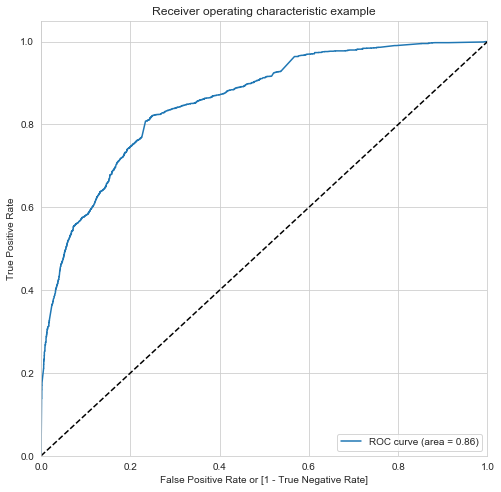

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# fpr, tpr, thresholds = roc_curve( pred.Converted, pred.pred, drop_intermediate = False )

draw_roc(pred.Converted,pred.Probability)

 #### The Area Under the Curve is 0.86 

# Step 9: Choosing the optimal point

In [92]:
confusion

array([[3468,  485],
       [ 922, 1497]], dtype=int64)

In [93]:
pred1=pred.copy()

In [94]:
for i in range(10):
    pred1[(i/10)] = pred1['Probability'].apply(lambda x : 1 if x>(i/10) else 0)

In [95]:
pred1.head()

Converted  Probability  pred  0.0  0.1  \
Prospect ID                                                                    
762ac94b-18a8-4fbf-b39e-8f1caf0b8986  0          0.744925     1     1    1     
ca887e61-3e87-49e8-a198-e188ee7b8ba9  0          0.167410     0     1    1     
2e78bb85-8eed-46ed-a22f-25300afec646  0          0.498768     0     1    1     
d2028e62-0189-4e3e-8653-a4822d98eb56  1          0.914847     1     1    1     
bec6e14f-5df2-4c6a-905a-c0b03175868f  0          0.149629     0     1    1     

                                      0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
Prospect ID                                                                   
762ac94b-18a8-4fbf-b39e-8f1caf0b8986  1    1    1    1    1    1    0    0    
ca887e61-3e87-49e8-a198-e188ee7b8ba9  0    0    0    0    0    0    0    0    
2e78bb85-8eed-46ed-a22f-25300afec646  1    1    1    0    0    0    0    0    
d2028e62-0189-4e3e-8653-a4822d98eb56  1    1    1    1    1    1    1    1    
bec6e14f-5df2-4c6a-905a-c0b03175868f  0    0    0    0    0    0    0    0

In [96]:
cut_df = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity','precision','recall']) 
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = confusion_matrix(pred1.Converted,pred1[i])
    total = sum(sum(cm))
    acc = (cm[0,0]+cm[1,1])/total
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    reca = sensi
    preci = cm[1,1]/(cm[1,1]+cm[0,1])
    cut_df.loc[i] = [i,acc,sensi,speci,preci,reca]
cut_df

prob  accuracy  sensitivity  specificity  precision    recall
0.0  0.0   0.379630  1.000000     0.000000     0.379630   1.000000
0.1  0.1   0.584275  0.977263     0.343790     0.476805   0.977263
0.2  0.2   0.679535  0.891277     0.549962     0.547903   0.891277
0.3  0.3   0.753296  0.838776     0.700987     0.631890   0.838776
0.4  0.4   0.778406  0.750310     0.795598     0.691956   0.750310
0.5  0.5   0.779190  0.618851     0.877308     0.755298   0.618851
0.6  0.6   0.785625  0.554361     0.927144     0.823204   0.554361
0.7  0.7   0.768048  0.463001     0.954718     0.862202   0.463001
0.8  0.8   0.727244  0.303431     0.986592     0.932656   0.303431
0.9  0.9   0.700251  0.219926     0.994182     0.958559   0.219926

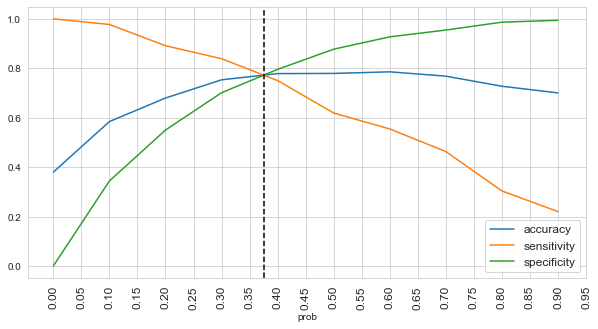

In [97]:
# Choosing the optimal point
ax = cut_df.plot(x='prob',y=['accuracy','sensitivity','specificity'],figsize=(10,5))
plt.xticks(np.arange(1,step=0.05),rotation=90,fontsize=12)
ax.axvline(0.375,c='black',linestyle='--')
plt.legend(fontsize=12)
plt.show()

#### Here, the optimal point is 0.375

In [98]:
pred1 = pred1[pred1.columns[:3]]

In [99]:
# Prediction based on sensitivity and specificity
pred1['Final_ss'] = pred1['Probability'].apply(lambda x : 1 if x>0.375 else 0)

In [100]:
pred1.head()

Converted  Probability  pred  Final_ss
Prospect ID                                                                 
762ac94b-18a8-4fbf-b39e-8f1caf0b8986  0          0.744925     1     1       
ca887e61-3e87-49e8-a198-e188ee7b8ba9  0          0.167410     0     0       
2e78bb85-8eed-46ed-a22f-25300afec646  0          0.498768     0     1       
d2028e62-0189-4e3e-8653-a4822d98eb56  1          0.914847     1     1       
bec6e14f-5df2-4c6a-905a-c0b03175868f  0          0.149629     0     0

In [101]:
# Checking the model metrics
LogR_metrics(confusion_matrix(pred1.Converted,pred1.Final_ss),pred1.Converted,pred1.Final_ss)

Accuarcy : 		 0.77
Sensitivity : 		 0.77
Specificity : 		 0.78
Precision : 		 0.68
Recall : 		 0.77
True Positive Rate : 	 0.77
True Negative Rate : 	 0.78
False Positive Rate : 	 0.22
False Negative Rate : 	 0.23
Positive Predicted Value : 	 0.68
Negative Predicted Value : 	 0.84
F1 score : 		 0.72



Pred_Negative  Pred_Positive
Actual_Negative  3077           876          
Actual_Positive  566            1853

## Precision/Recall tradeoff

In [102]:
# Attributes for plotting precision-recall curve
p,r,thresh = precision_recall_curve(pred1.Converted,pred1.Probability)

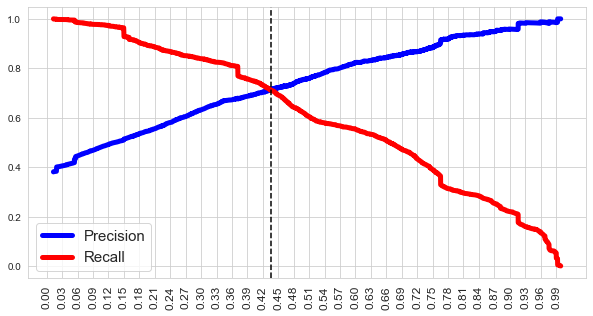

In [103]:
# Plot for getting the optimal value on the precision vs recall
plt.figure(figsize=(10,5))
plt.plot(thresh, p[:-1],'b-',linewidth=5)
plt.plot(thresh, r[:-1], "r-",linewidth=5)
plt.axvline(0.435,c='black',linestyle='--')
plt.xticks(np.arange(1,step=0.03),fontsize=12,rotation=90)
plt.legend(labels=['Precision','Recall'],fontsize=15)
plt.show()

#### In the Precision-Recall Tradeoff, The optimal point is 0.435

In [104]:
pred1['Final_pr'] = pred1['Probability'].apply(lambda x : 1 if x>0.435 else 0)

pred1.head()

Converted  Probability  pred  Final_ss  \
Prospect ID                                                                    
762ac94b-18a8-4fbf-b39e-8f1caf0b8986  0          0.744925     1     1          
ca887e61-3e87-49e8-a198-e188ee7b8ba9  0          0.167410     0     0          
2e78bb85-8eed-46ed-a22f-25300afec646  0          0.498768     0     1          
d2028e62-0189-4e3e-8653-a4822d98eb56  1          0.914847     1     1          
bec6e14f-5df2-4c6a-905a-c0b03175868f  0          0.149629     0     0          

                                      Final_pr  
Prospect ID                                     
762ac94b-18a8-4fbf-b39e-8f1caf0b8986  1         
ca887e61-3e87-49e8-a198-e188ee7b8ba9  0         
2e78bb85-8eed-46ed-a22f-25300afec646  1         
d2028e62-0189-4e3e-8653-a4822d98eb56  1         
bec6e14f-5df2-4c6a-905a-c0b03175868f  0

In [105]:
# Checking the Metrics
LogR_metrics(confusion_matrix(pred1.Converted,pred1.Final_pr),pred1.Converted,pred1.Final_pr)

Accuarcy : 		 0.78
Sensitivity : 		 0.71
Specificity : 		 0.83
Precision : 		 0.71
Recall : 		 0.71
True Positive Rate : 	 0.71
True Negative Rate : 	 0.83
False Positive Rate : 	 0.17
False Negative Rate : 	 0.29
Positive Predicted Value : 	 0.71
Negative Predicted Value : 	 0.82
F1 score : 		 0.71



Pred_Negative  Pred_Positive
Actual_Negative  3265           688          
Actual_Positive  699            1720

In [106]:
pred1['Lead scores'] = pred1['Probability']*100

pred1.head()

Converted  Probability  pred  Final_ss  \
Prospect ID                                                                    
762ac94b-18a8-4fbf-b39e-8f1caf0b8986  0          0.744925     1     1          
ca887e61-3e87-49e8-a198-e188ee7b8ba9  0          0.167410     0     0          
2e78bb85-8eed-46ed-a22f-25300afec646  0          0.498768     0     1          
d2028e62-0189-4e3e-8653-a4822d98eb56  1          0.914847     1     1          
bec6e14f-5df2-4c6a-905a-c0b03175868f  0          0.149629     0     0          

                                      Final_pr  Lead scores  
Prospect ID                                                  
762ac94b-18a8-4fbf-b39e-8f1caf0b8986  1         74.492472    
ca887e61-3e87-49e8-a198-e188ee7b8ba9  0         16.740984    
2e78bb85-8eed-46ed-a22f-25300afec646  1         49.876770    
d2028e62-0189-4e3e-8653-a4822d98eb56  1         91.484674    
bec6e14f-5df2-4c6a-905a-c0b03175868f  0         14.962919

In [107]:
# Classificaiton Report for the training
print(classification_report(pred1.Converted,pred1.Final_pr))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3953
           1       0.71      0.71      0.71      2419

    accuracy                           0.78      6372
   macro avg       0.77      0.77      0.77      6372
weighted avg       0.78      0.78      0.78      6372



# Step 10: Testing the model

In [108]:
# Predicted values of the test data

x_test_sm = sm.add_constant(x_test[x.columns])

pred_test = logregg6.predict(x_test_sm)

In [109]:
pred_t1  = pd.DataFrame({'Converted' :y_test,'Probability':pred_test})

pred_t1

Converted  Probability
Prospect ID                                                 
7f5e4c3e-3786-435f-aae4-7590cc6d6331  0          0.312887   
01d6d18a-39e3-48de-9e93-2ec63b2ace60  1          0.916333   
bb8e9fc5-3f58-4fef-8483-10ad1d489490  0          0.320447   
1bb09094-386f-49ac-ae86-ccf5fa89eaf8  0          0.312625   
4f8f7d9f-423c-43ed-8190-10e6ef00d03f  1          0.259378   
...                                  ..               ...   
979c920c-0bb6-4395-b64d-a50577d9767a  0          0.420220   
148a8258-5e36-4935-85a5-9f544e2dc600  0          0.479328   
dddea45b-bf31-4fff-b23f-5cb0c9fe926b  0          0.072976   
ab345857-4a63-47bc-ad2e-876ba9eff48e  1          0.852112   
557bc9f4-4de9-4d83-8ce2-161b9252bbcf  1          0.896182   

[2731 rows x 2 columns]

In [110]:
# Creating the final predicted values according to the Precision and Recall
pred_t1['Final_pred'] = pred_t1['Probability'].apply(lambda x : 1 if x>0.435 else 0)

pred_t1

Converted  Probability  Final_pred
Prospect ID                                                             
7f5e4c3e-3786-435f-aae4-7590cc6d6331  0          0.312887     0         
01d6d18a-39e3-48de-9e93-2ec63b2ace60  1          0.916333     1         
bb8e9fc5-3f58-4fef-8483-10ad1d489490  0          0.320447     0         
1bb09094-386f-49ac-ae86-ccf5fa89eaf8  0          0.312625     0         
4f8f7d9f-423c-43ed-8190-10e6ef00d03f  1          0.259378     0         
...                                  ..               ...    ..         
979c920c-0bb6-4395-b64d-a50577d9767a  0          0.420220     0         
148a8258-5e36-4935-85a5-9f544e2dc600  0          0.479328     1         
dddea45b-bf31-4fff-b23f-5cb0c9fe926b  0          0.072976     0         
ab345857-4a63-47bc-ad2e-876ba9eff48e  1          0.852112     1         
557bc9f4-4de9-4d83-8ce2-161b9252bbcf  1          0.896182     1         

[2731 rows x 3 columns]

In [111]:
# Evaluating the test scores
LogR_metrics(confusion_matrix(pred_t1.Converted,pred_t1.Final_pred),pred_t1.Converted,pred_t1.Final_pred)

Accuarcy : 		 0.77
Sensitivity : 		 0.69
Specificity : 		 0.82
Precision : 		 0.7
Recall : 		 0.69
True Positive Rate : 	 0.69
True Negative Rate : 	 0.82
False Positive Rate : 	 0.18
False Negative Rate : 	 0.31
Positive Predicted Value : 	 0.7
Negative Predicted Value : 	 0.81
F1 score : 		 0.7



Pred_Negative  Pred_Positive
Actual_Negative  1387           302          
Actual_Positive  321            721

In [112]:

pred_t1['Lead score'] = round(pred_t1['Probability']*100)
pred_t1.sort_values('Probability',ascending=False)

Converted  Probability  Final_pred  \
Prospect ID                                                                
95083951-7aa0-4b4b-88a5-ae9425259af6  1          0.998369     1            
240134a6-7917-4a71-a0ac-909d9f055148  1          0.997591     1            
2a8fcd14-f2f1-4af7-85fd-65215d8d3468  1          0.996565     1            
a091e50b-361a-4603-a4e7-2fd54a9ee614  1          0.996089     1            
602c230a-619f-4afe-bdd6-4cd66a523d73  1          0.995751     1            
...                                  ..               ...    ..            
46280b2a-4002-414c-88e6-58d990421645  0          0.004438     0            
a3a0f1f7-e6f4-4026-90af-b4d3bf89200f  0          0.004438     0            
82cf5ee4-4c01-4f5b-bc33-172b922cbf8a  0          0.004438     0            
46f64697-ff6f-426d-965e-1999ea3b2319  0          0.004438     0            
80999be2-80a9-4945-ad0c-3a98185f4c7f  0          0.004438     0            

                                      Lead score  
Prospect ID                                       
95083951-7aa0-4b4b-88a5-ae9425259af6  100.0       
240134a6-7917-4a71-a0ac-909d9f055148  100.0       
2a8fcd14-f2f1-4af7-85fd-65215d8d3468  100.0       
a091e50b-361a-4603-a4e7-2fd54a9ee614  100.0       
602c230a-619f-4afe-bdd6-4cd66a523d73  100.0       
...                                     ...       
46280b2a-4002-414c-88e6-58d990421645  0.0         
a3a0f1f7-e6f4-4026-90af-b4d3bf89200f  0.0         
82cf5ee4-4c01-4f5b-bc33-172b922cbf8a  0.0         
46f64697-ff6f-426d-965e-1999ea3b2319  0.0         
80999be2-80a9-4945-ad0c-3a98185f4c7f  0.0         

[2731 rows x 4 columns]

In [113]:
pred_t1.head()

Converted  Probability  Final_pred  \
Prospect ID                                                                
7f5e4c3e-3786-435f-aae4-7590cc6d6331  0          0.312887     0            
01d6d18a-39e3-48de-9e93-2ec63b2ace60  1          0.916333     1            
bb8e9fc5-3f58-4fef-8483-10ad1d489490  0          0.320447     0            
1bb09094-386f-49ac-ae86-ccf5fa89eaf8  0          0.312625     0            
4f8f7d9f-423c-43ed-8190-10e6ef00d03f  1          0.259378     0            

                                      Lead score  
Prospect ID                                       
7f5e4c3e-3786-435f-aae4-7590cc6d6331  31.0        
01d6d18a-39e3-48de-9e93-2ec63b2ace60  92.0        
bb8e9fc5-3f58-4fef-8483-10ad1d489490  32.0        
1bb09094-386f-49ac-ae86-ccf5fa89eaf8  31.0        
4f8f7d9f-423c-43ed-8190-10e6ef00d03f  26.0

In [114]:
# Classificaiton Report for the test
print(classification_report(pred_t1.Converted,pred_t1.Final_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1689
           1       0.70      0.69      0.70      1042

    accuracy                           0.77      2731
   macro avg       0.76      0.76      0.76      2731
weighted avg       0.77      0.77      0.77      2731



### <font color ='green'> Magnitude and Sign of the Coefficients Loaded in the Logit Function: </font>

$ Logit(p) = log(p/(1-p)) = 1.3728 + (3.665  \times  What \space is \space your \space current \space occupation_Working \space Professional) + (2.238  \times  Lead \space Score_Welingak \space Website) + (1.35 \times What \space is \space your \space current occupation_Student) + (1.21 \times LastActivity_SMS \space Sent) + (1.129 \times What \space is \space your \space current \space occupation_Unemployed) + (0.90 \times Total \space Time \space Spent \space on \space Website) - (3.704 \times Lead \space Origin_Landing \space Page \space Submission) - (2.920 \times Lead \space Origin_API)-(1.458 \times Do \space Not \space Email_Yes) -(1.457 \times LastActivity_Converted \space to \space Lead) - (1.087 \times Last \space Activity_Olark \space Chat \space Conversation) $

# <font color ='green'> CONCLUSION: </font>

- Our model explains the relationship of variables quite decently and according to the lead scores assigned we can understand whether the conversion would happen or not.


- We can see that `What is your current occupation_Working Professional` variable is having the highest positive coefficient 3.6659, which means if the <u> If customer is a Working Professional, the chances that the customer will increase are 3.6659 times. </u>


- We can also see variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. Here, if these independent variables increase, the chances that the lead converts would decrease. The variable with highest negative coefficient is:   `Lead Origin_Landing Page Submission`


- Top 3 Variables that have highest probability that the lead would convert are:
  - What is your current occupation? (Particularly ‘Working Professional’  and ‘Student’)
  - Lead Source (Particularly ‘Welingak Website’)
  - Last Activity (Particularly ‘SMS Sent’)